# Universal Viscosity Approximators

In [1]:
import numpy as np

# Plotting style: 
# https://towardsdatascience.com/an-introduction-to-making-scientific-publication-plots-with-python-ea19dfa7f51e
import matplotlib as mpl
from matplotlib import pyplot  as plt
%matplotlib inline
mpl.rcParams['font.family'] = 'Verdana'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 7
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 7
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.top'] = 'on'
mpl.rcParams['xtick.minor.top'] = 'on'
mpl.rcParams['ytick.major.right'] = 'on'
mpl.rcParams['ytick.minor.right'] = 'on'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlepad'] = 10

# # Save figure
# plt.savefig('Final_Plot.png', dpi=300, transparent=False, bbox_inches='tight')

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian porcess library
import GPy



# What type of functions do I need?
- non-parametric, kernel functions

In [2]:
# Create a 1-D RBF kernel with default parameters
k = GPy.kern.RBF(1)
# Preview the kernel's parameters
k

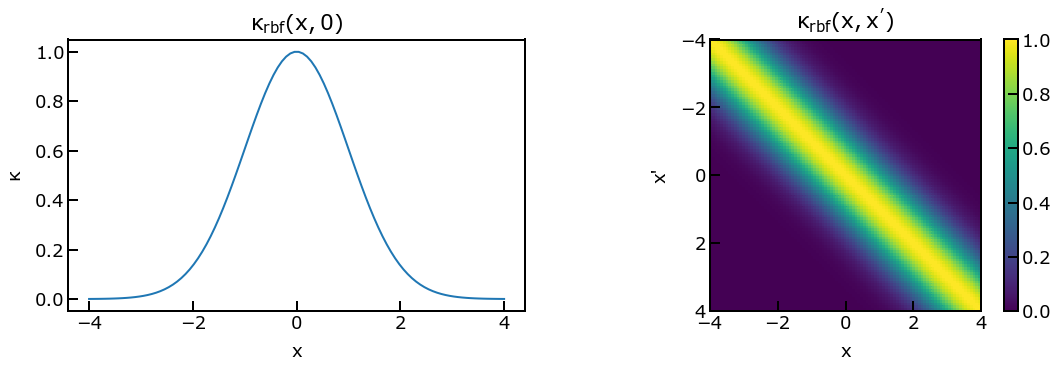

In [3]:
# Our sample space: 100 samples in the interval [-4,4]
X = np.linspace(-4.,4.,100)[:, None] # we need [:, None] to reshape X into a column vector for use in GPy

# Set up the plotting environment
plt.figure(figsize=(18,5))

# ==== k(x,0)
plt.subplot(121) # left plot

# First, sample kernel at x' = 0
K = k.K(X, np.array([[0.]])) # k(x,0)

# Plot covariance vector
plt.plot(X,K)

# Annotate plot
plt.xlabel("x", labelpad=10)
plt.ylabel(r"$\mathregular{\kappa}$", labelpad=10)
plt.title(r"$\mathregular{\kappa_{rbf}(x,0)}$", pad=10)

# ==== k(x,x')

plt.subplot(122) # right plot

# The kernel takes two inputs, and outputs the covariance between each respective point in the two inputs
K = k.K(X,X)

# Plot the covariance of the sample space
plt.pcolor(X.T, X, K)

# Format and annotate plot
plt.gca().invert_yaxis()
plt.gca().axis("image")
plt.xlabel("x", labelpad=10)
plt.ylabel("x'", labelpad=10)
plt.colorbar()
plt.title(r"$\mathregular{\kappa_{rbf}(x,x')}$");

# Setting the kernel parameters

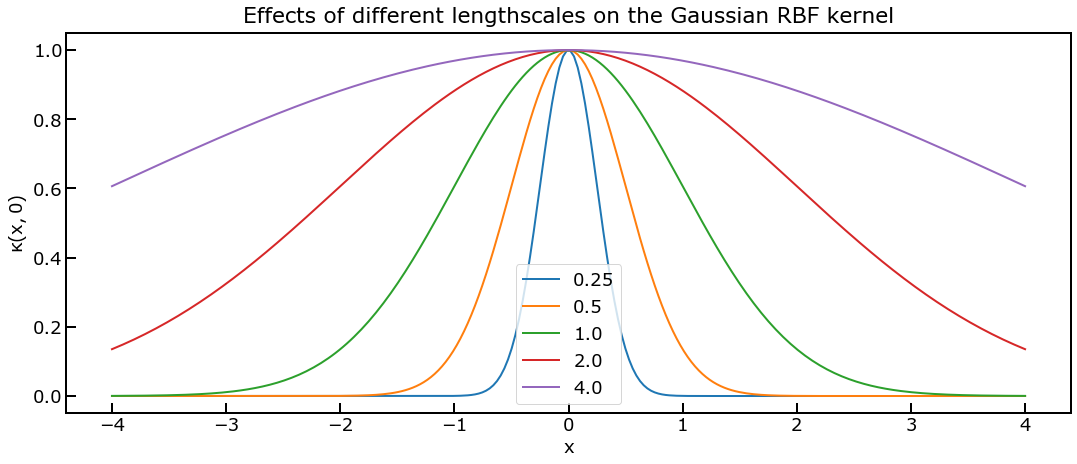

In [4]:
# Our sample space : 100 samples in the interval [-4,4] 
X = np.linspace(-4.,4.,250)[:, None] # we use more samples to get a smoother plot at low lengthscales

# Create a 1-D RBF kernel with default parameters
k = GPy.kern.RBF(1)

# Set up the plotting environment
plt.figure(figsize=(18, 7))

# Set up our list of different lengthscales
ls = [0.25, 0.5, 1., 2., 4.]

# Loop over the lengthscale values
for l in ls:
    # Set the lengthscale to be l
    k.lengthscale = l
    # Calculate the new covariance function at k(x,0)
    C = k.K(X, np.array([[0.]]))
    # Plot the resulting covariance vector
    plt.plot(X,C)

# Annotate plot
plt.xlabel("x"), plt.ylabel(r"$\mathregular{\kappa(x,0)}$") 
plt.title("Effects of different lengthscales on the Gaussian RBF kernel")
plt.legend(labels=ls);

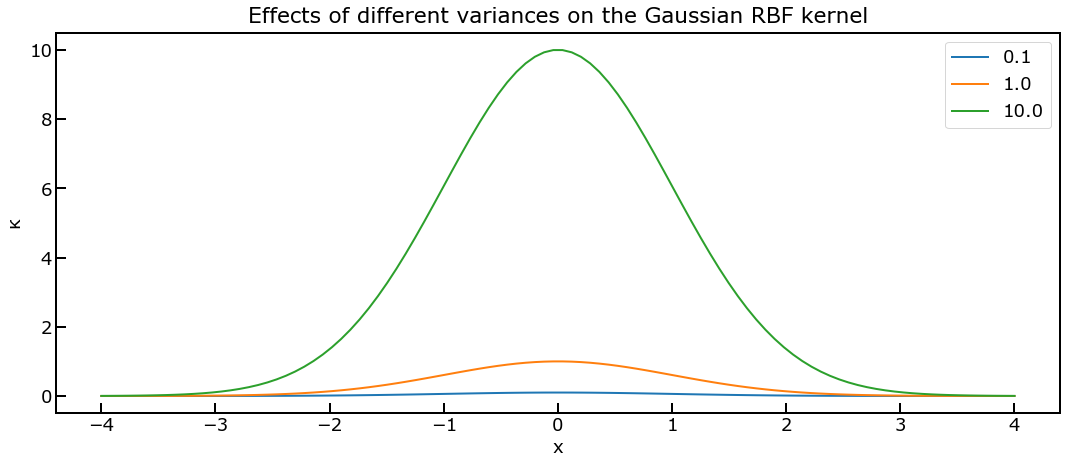

In [5]:
X = np.linspace(-4.,4.,100)[:, None]

k = GPy.kern.RBF(1)

# List of variances
vs = [0.1, 1., 10.]

plt.figure(figsize=(18, 7))

for v in vs:
    # Set the variance parameter of the kernel
    k.variance = v
    C = k.K(X, np.array([[0.]]))
    plt.plot(X,C)

# Annotate plot
plt.xlabel("x"), plt.ylabel("$\mathregular{\kappa}$") 
plt.title("Effects of different variances on the Gaussian RBF kernel")
plt.legend(labels=vs);

# Sampling from a Gaussian Distribution

A Gaussian process provides a prior over some infinite-dimensional function, defined by a mean function and covariance function

$$ f(x) \sim \mathcal{GP}(m(x), k(x,x'))$$

When we sample from the covariance function, $k$, to create a matrix over some sample space, we are creating a matrix of values that describe the covariance between sample points. Since it is not possible to sample every single point in an infinite dimensional function, we have to sample a finite subset of the input domain. Let $\mathbf{X}$ denote some sample inputs, and $\mathbf{K}$ the covariance matrix, with elements $K_{ij} = k(\mathbf{X}_i,\mathbf{X}_j)$, then we can describe the prior over $f(\mathbf{X})$ as a (finite-dimensional) normal distribution with covariance $\mathbf{K}$. As such, we can easily create samples of $f$ which, for a good choice of $\mathbf{X}$, are representative of the true function.

We can also sample from the kernel prior by creating a covariance matrix over a sample space and sampling from a zero-mean multivariate normal distribution with covariance $\mathbf{K}$. Below are examples of different kernels with different parameters, including composite kernels.

The following plots demonstrate samples from a Gaussian process prior and the corresponding covariance matrix


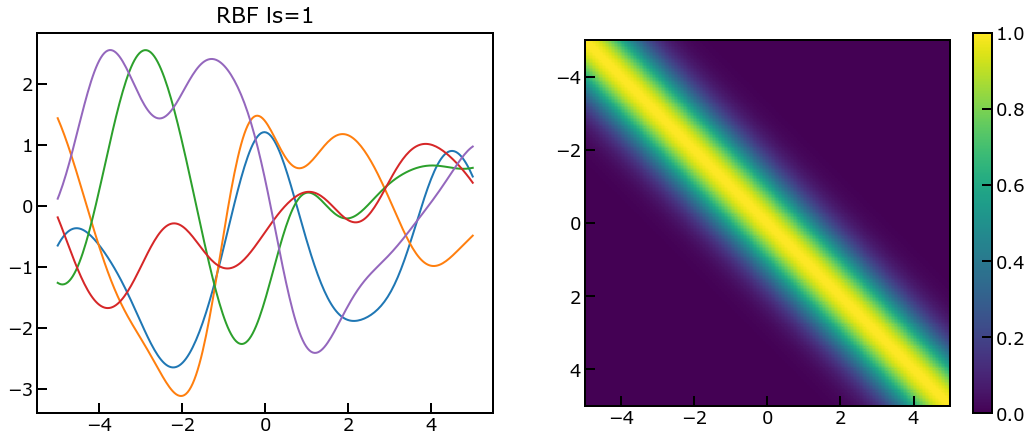

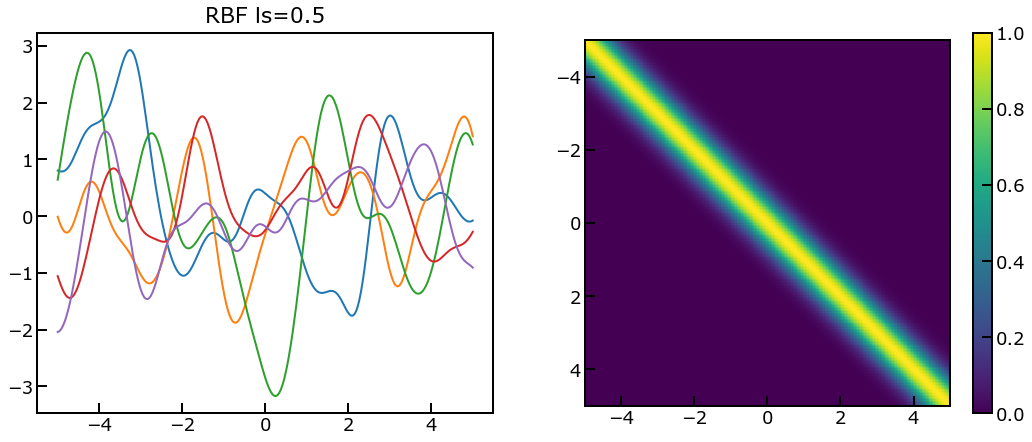

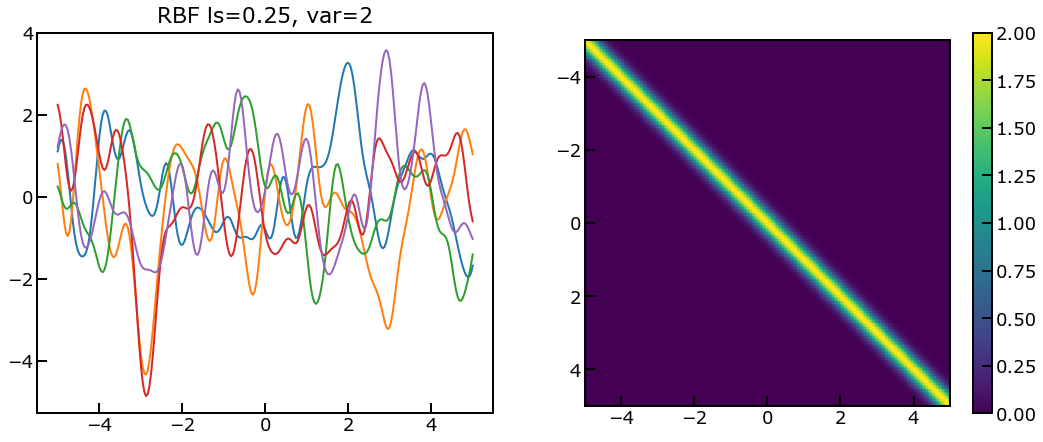

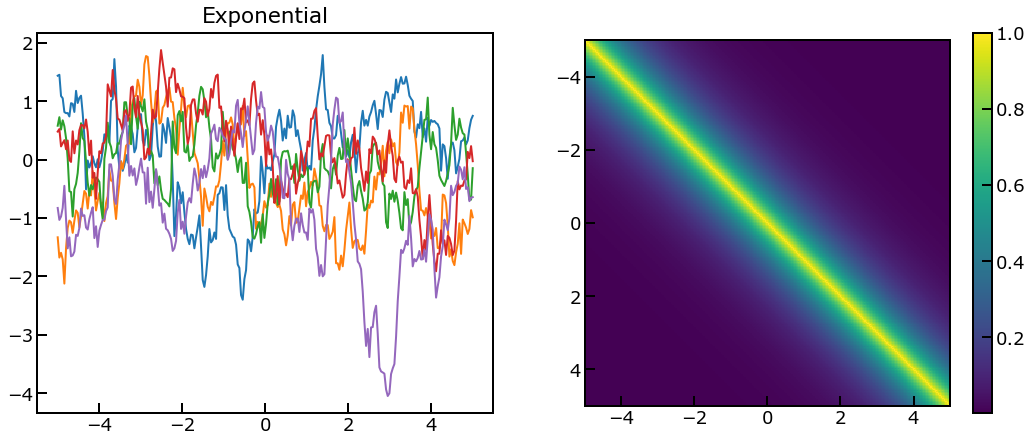

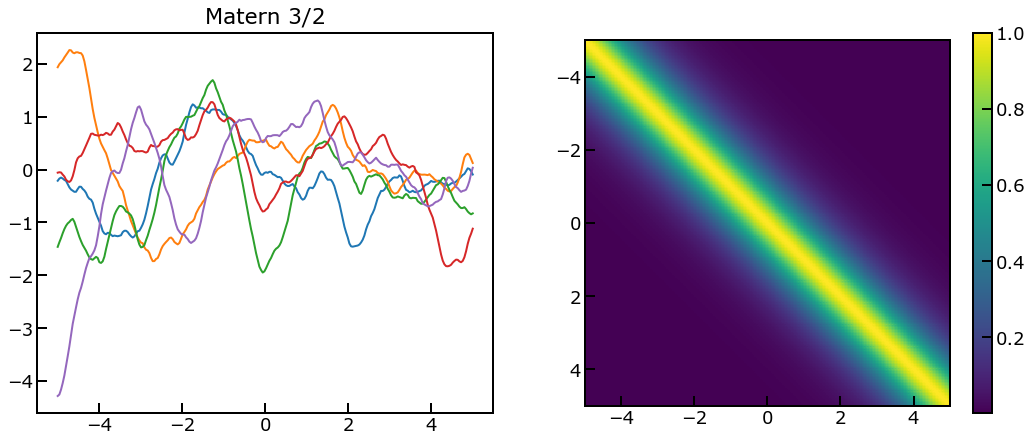

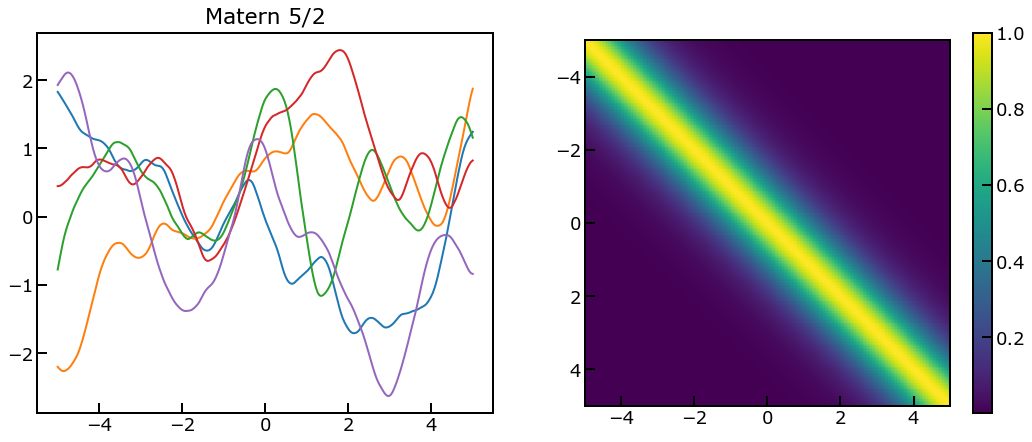

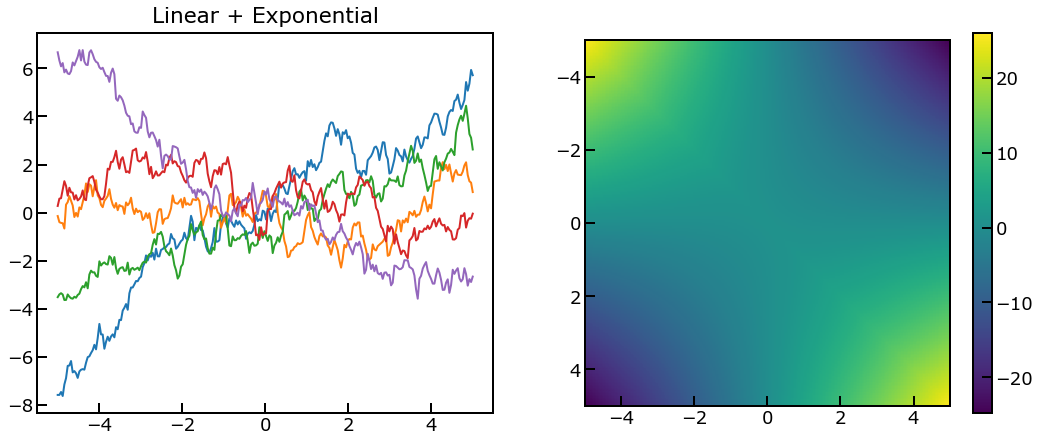

In [6]:
ks = [ # List of example kernels
    GPy.kern.RBF(1, lengthscale=1.),
    GPy.kern.RBF(1, lengthscale=0.5),
    GPy.kern.RBF(1, lengthscale=0.25, variance=2.),
    GPy.kern.Exponential(1),
    GPy.kern.Matern32(1),
    GPy.kern.Matern52(1),
    GPy.kern.Linear(1) + GPy.kern.Exponential(1)
    ]

# The name of our kernels (for the legend)
kernel_name = ["RBF ls=1", "RBF ls=0.5", "RBF ls=0.25, var=2", "Exponential", "Matern 3/2", 
               "Matern 5/2", "Linear + Exponential"]

# Our sample space
X = np.linspace(-5., 5., 250)[:, None]

print("The following plots demonstrate samples from a Gaussian process prior and the corresponding covariance matrix")

# Loop through our kernels
for i,k in enumerate(ks):
    # The mean function is set to 0
    mu = np.zeros((250)) # we have 250 sample inputs
    # Get the covariance matrix
    if i is not 11:
        C  = k.K(X,X)
    else: # We have to sample White noise kernel differently
        C = k.K(X)
        
    # Sample 5 times from a multivariate Gaussian distribution with mean 0 and covariance k(X,X)
    Z  = np.random.multivariate_normal(mu, C, 5)
    
    # Setup figure environment
    plt.figure(figsize=(18, 7))
    
    # Show samples on left hand side
    plt.subplot(121)
    for j in range(5 if i < 11 else 2): # Loop through samples
        plt.plot(X[:],Z[j,:])
        plt.title(kernel_name[i])
        
    # Visualise covariance matrix on right hand side
    plt.subplot(122)
    plt.pcolor(X.T, X, C)
    # Annotate plot
    plt.gca().invert_yaxis(), plt.gca().axis("image")
    plt.colorbar()

# Part I: Gaussian Process Regression

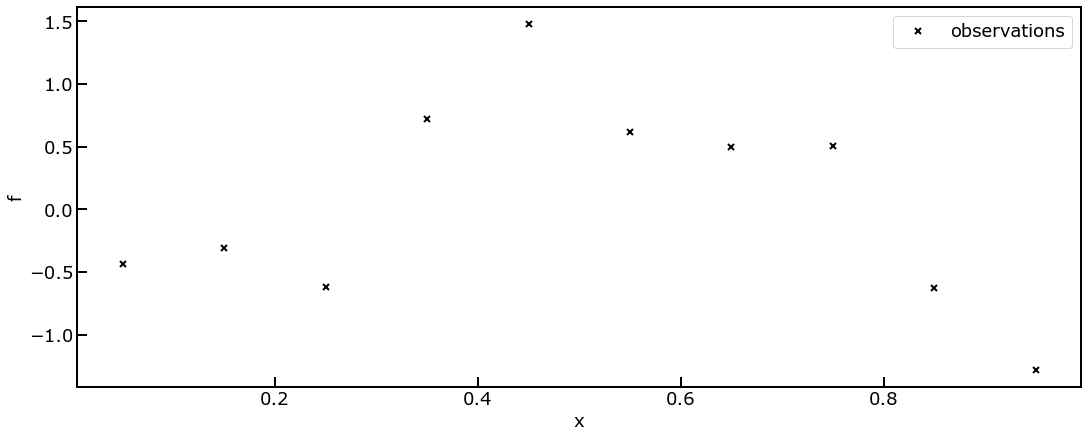

In [7]:
# lambda function, call f(x) to generate data
f = lambda x: -np.cos(2*np.pi*x) + 0.5*np.sin(6*np.pi*x)

# 10 equally spaced sample locations 
X = np.linspace(0.05, 0.95, 10)[:,None]

# y = f(X) + epsilon
Y = f(X) + np.random.normal(0., 0.1, (10,1)) # note that np.random.normal takes mean and s.d. (not variance), 0.1^2 = 0.01

# Setup our figure environment
plt.figure(figsize=(18, 7))

# Plot observations
plt.plot(X, Y, "kx", mew=2)

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["observations"]);

In [8]:
k = GPy.kern.RBF(1, variance=1., lengthscale=0.1, name="rbf")

In [9]:
# New test points to sample function from
Xnew = np.linspace(-0.05, 1.05, 100)[:, None]

# Covariance between training sample points (+ Gaussian noise)
Kxx = k.K(X,X) + 1 * np.eye(10)

# Covariance between training and test points
Ksx = k.K(Xnew, X)

# Covariance between test points
Kss = k.K(Xnew,Xnew)

# The mean of the GP fit (note that @ is matrix multiplcation: A @ B is equivalent to np.matmul(A,B))
mean = Ksx @ np.linalg.inv(Kxx) @ Y
# The covariance matrix of the GP fit
Cov = Kss - Ksx @ np.linalg.inv(Kxx) @ Ksx.T

In [10]:
def plot_gp(X, m, C, training_points=None):
    """ Plotting utility to plot a GP fit with 95% confidence interval """
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0],
                     m[:,0] - 1.96*np.sqrt(np.diag(C)),
                     m[:,0] + 1.96*np.sqrt(np.diag(C)),
                     alpha=0.5)
    # Plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels=["GP fit"])
    
    plt.xlabel("x"), plt.ylabel("f")
    
    # Plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels=["GP fit", "observations"])

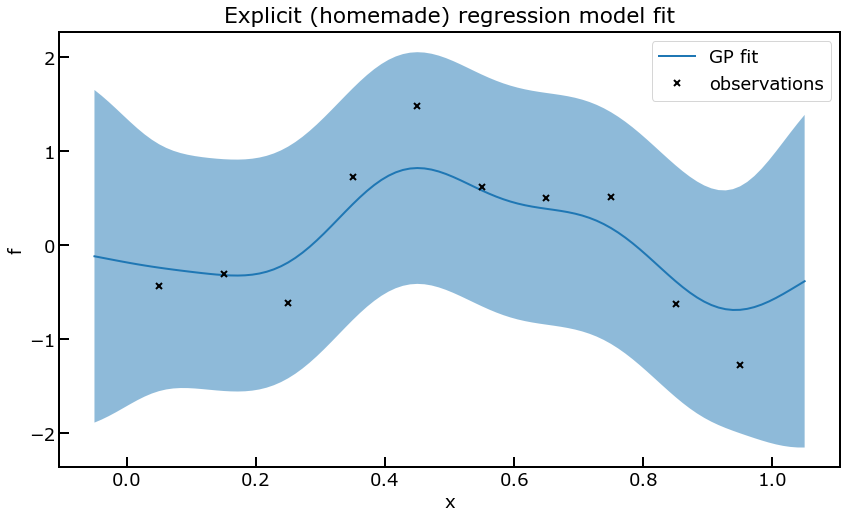

In [11]:
plt.figure(figsize=(14, 8))

# Plot the GP fit mean and covariance
plot_gp(Xnew, mean, Cov, training_points=(X,Y))
plt.title("Explicit (homemade) regression model fit");

In [12]:
m = GPy.models.GPRegression(X, Y, k)
m

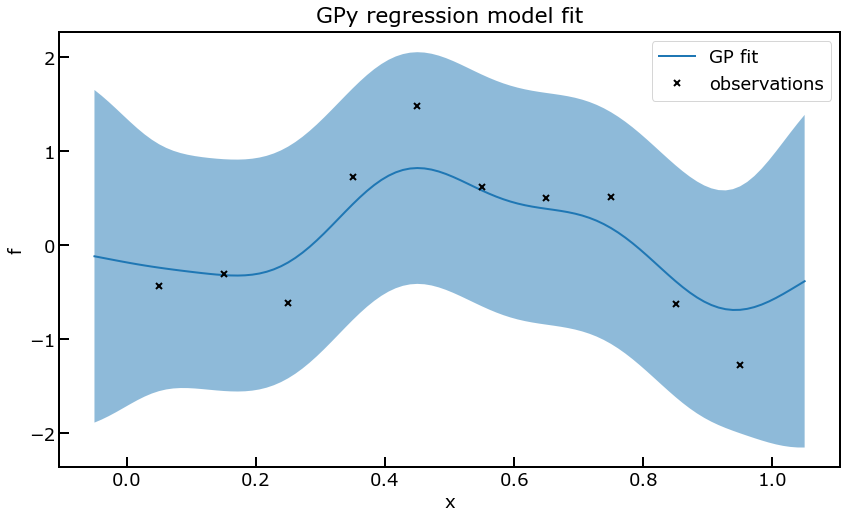

In [13]:
# Use GPy model to calculate the mean and covariance of the fit at Xnew
mean, Cov = m.predict_noiseless(Xnew, full_cov=True)

plt.figure(figsize=(14, 8))

# Plot the GP fit mean and covariance
plot_gp(Xnew, mean, Cov, training_points=(X,Y))
plt.title("GPy regression model fit");

## Playing & Eyballing with the kernel hyperparameters to improve the GP fit || not what I want!

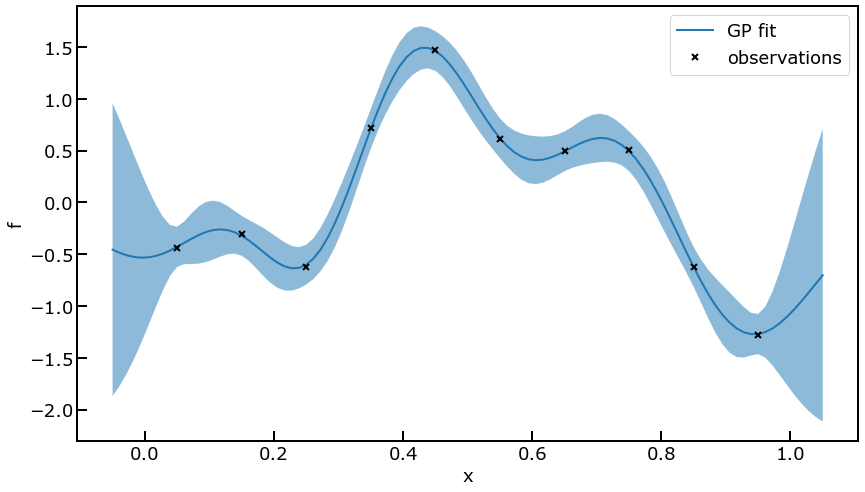

In [14]:
m.Gaussian_noise = 0.01
m.rbf.lengthscale = 0.1

mean, Cov = m.predict_noiseless(Xnew, full_cov=True)

plt.figure(figsize=(14, 8))
# Plot the GP fit mean and covariance
plot_gp(Xnew, mean, Cov, training_points=(X,Y))

# Preview the regression model
display(m)

## Sample the GP posterior

(c) Given that we can obtain the mean and covariance of the GP fit, we can also sample the GP posterior as a multivariate Gaussian process. This can be done as in Section 4, where we sampled the priors as defined by the kernels, i.e. with `np.random.multivariate_normal`. Obtain 10 samples from the GP posterior and plot them alongside the data. Try to simulate noisy measurements using `m.predict` (rather than `m.predict_noiseless`).

*Remember to get the full covariance matrix, using `full_cov=True`, and note that to make the mean vector 1-D (for sampling a multivariate normal), you need `np.random.multivariate_normal(mean[:,0], Cov)`)*

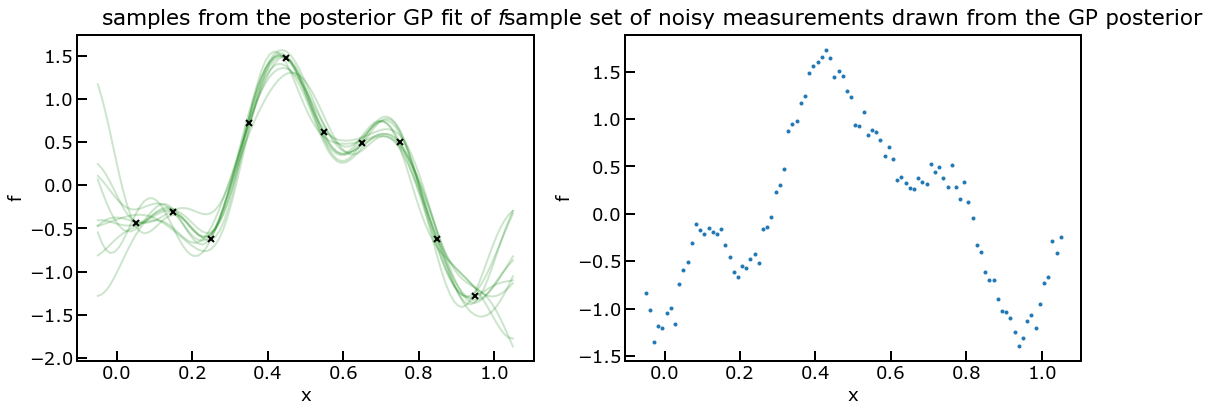

In [15]:
plt.figure(figsize=(18, 6))

mean, Cov = m.predict_noiseless(Xnew, full_cov=True)

Z  = np.random.multivariate_normal(mean[:,0], Cov, 10)
plt.subplot(121)
for z in Z:
    plt.plot(Xnew, z, "g-", alpha=0.2)
plt.plot(X, Y, "kx", mew=2)
plt.xlabel("x"), plt.ylabel("f"), plt.title("samples from the posterior GP fit of $f$")    

mean, Cov = m.predict(Xnew, full_cov=True)
z  = np.random.multivariate_normal(mean[:,0], Cov)
plt.subplot(122)
plt.plot(Xnew, z, ".")
plt.xlabel("x"), plt.ylabel("f"), plt.title("sample set of noisy measurements drawn from the GP posterior");

## From eye-balling kernel hyperparameters to Kernel Parameter Estimation with Optimization

In [16]:
m.optimize()
m

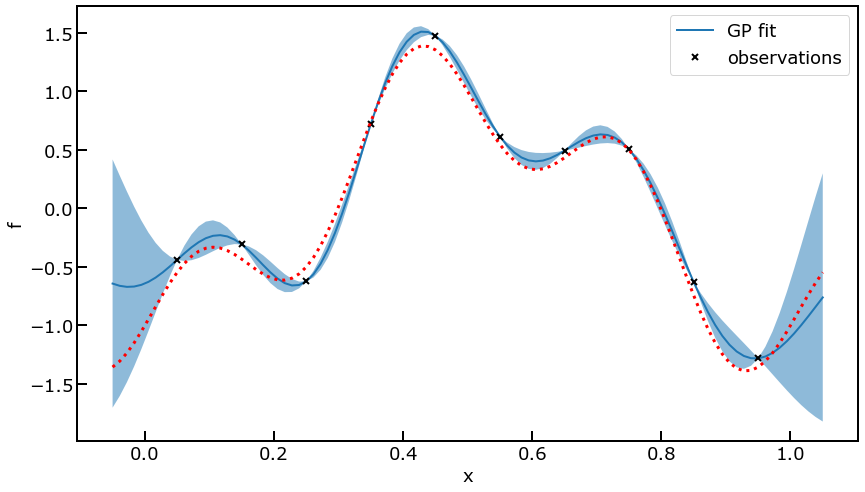

In [17]:
# Get mean and covariance of optimised GP
mean, Cov = m.predict_noiseless(Xnew, full_cov=True)

# Setup the figure environment
plt.figure(figsize=(14, 8))

# Plot the GP fit mean and covariance
plot_gp(Xnew, mean, Cov, training_points=(X,Y))
plt.plot(Xnew, f(Xnew), "r:", lw=3)

In [18]:
# Constrain the regression parameters to be positive only
m.constrain_positive()

# Fix the Gaussian noise variance at 0.01 
m.Gaussian_noise.variance = 0.01 # (Reset the parameter first)
m.Gaussian_noise.variance.fix()

# Reoptimise
m.optimize()
m

reconstraining parameters GP_regression


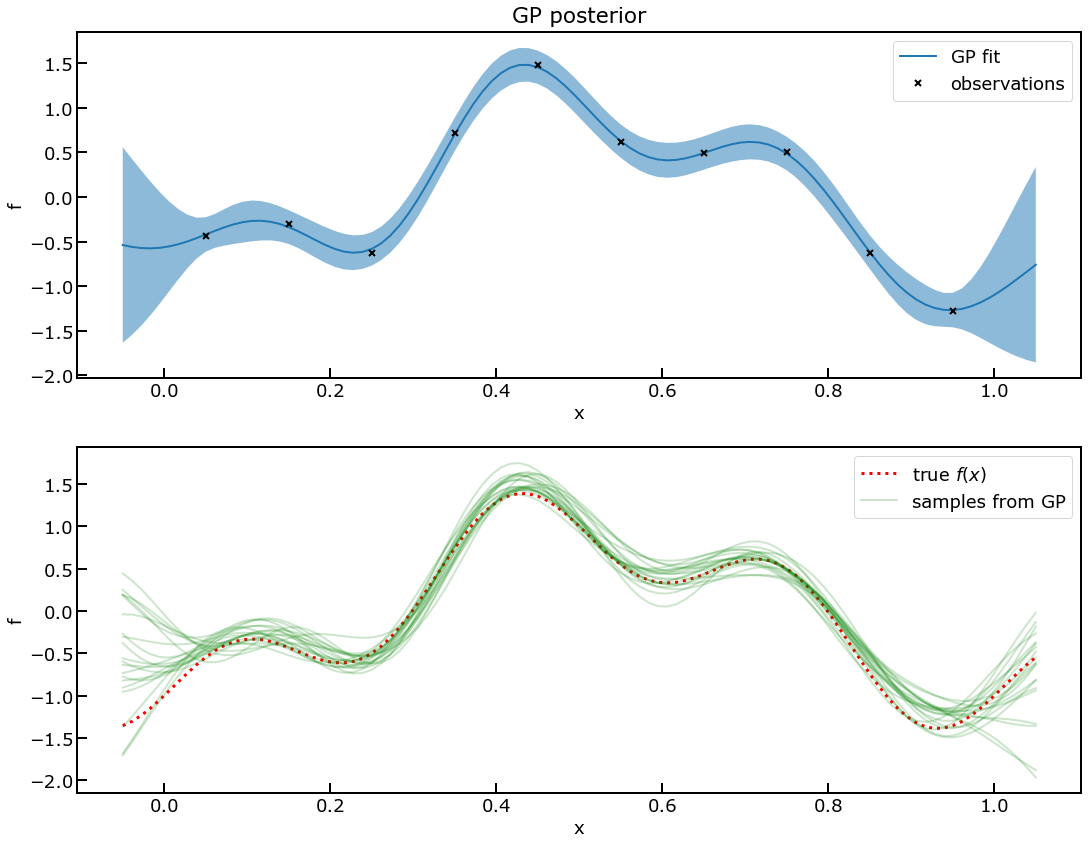

In [19]:
# Get mean and covariance of optimised GP
mean, Cov = m.predict_noiseless(Xnew, full_cov=True)

# Setup our figure environment
plt.figure(figsize=(18, 14))

# The top plot shows our mean regression fit and 95% confidence intervals 
plt.subplot(211)
# Plot the GP fit mean and covariance
plot_gp(Xnew, mean, Cov, training_points=(X,Y))
plt.title("GP posterior")
plt.subplot(212)

plt.plot(Xnew, f(Xnew),"r:", lw=3)

Z  = np.random.multivariate_normal(mean[:,0], Cov, 20)
for z in Z:
    plt.plot(Xnew,z, "g-", alpha=0.2)
    
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["true $f(x)$", "samples from GP"]);

# Capillary Data Example

In [20]:
# Load Data
X = np.array([0, 1.58e01, 3.98e01, 6.31e01, 1.00e02, 1.58e02, 2.51e02, 3.98e02, 6.30e02, 1.00e03, 1.58e03, 2.51e03])

Y = np.array([1.78e03, 1.53e03, 1.30e03, 1.09e03, 9.40e02, 7.53e02, 6.03e02, 4.72e02, 3.62e02, 2.68e02, 1.94e02, 1.37e02])

# print(X.shape)
# print(Y.shape)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X.reshape(-1,1))
scaled_Y = scaler.fit_transform(Y.reshape(-1,1))

# print(scaled_X.shape)
# print(scaled_Y.shape)

# print(scaled_X)
# print(scaled_Y)

In [22]:
# n = 0.74015
# no = 1852
# n_inf = -494.87
# rel_time = -0.071

# f = lambda xi: n_inf+(no-n_inf)*(1+(rel_time*xi)**2)**((n-1)/2)

# N = 10
# X_grid = np.linspace(0, 5e3, N)
# print(X_grid)
# Y_grid = f(X_grid)

# # print(X_grid.shape)
# # print(Y_grid.shape)

# # Set up our plotting environment
# plt.figure(figsize=(14, 8))
# plt.plot(X_grid, Y_grid, "g-");

# scaled_X_grid = scaler.fit_transform(X_grid.reshape(-1,1))
# scaled_Y_grid = scaler.fit_transform(Y_grid.reshape(-1,1))
# print(scaled_X_grid)
# # scaled_X_grid = np.sort(scaled_X_grid, axis =0)
# # scaled_Y_grid = np.sort(scaled_Y_grid)[::-1]

# plt.figure(figsize=(14, 8))
# plt.plot(scaled_X_grid, scaled_Y_grid, "g-");


In [23]:
# split = int(scaled_X.shape[0]*1)
# scaled_X_train, scaled_X_test = scaled_X[:split,:], scaled_X[split:,:]
# scaled_Y_train, scaled_Y_test = scaled_Y[:split,:], scaled_Y[split:,:]
# print(scaled_X_train, scaled_Y_train)
# print(scaled_X_test, scaled_Y_test)

from sklearn.model_selection import train_test_split
scaled_X_train, scaled_X_test, scaled_Y_train, scaled_Y_test = train_test_split(scaled_X, scaled_Y, 
                                                                                test_size=0.5, random_state=42)

scaled_X_train = scaled_X_train.reshape(-1,1)
# print(scaled_X_train)
scaled_X_test = scaled_X_test.reshape(-1,1)
# print(scaled_X_test)
scaled_Y_train = scaled_Y_train.reshape(-1,1)
# print(scaled_Y_train)
scaled_Y_test = scaled_Y_test.reshape(-1,1)
# print(scaled_Y_test)

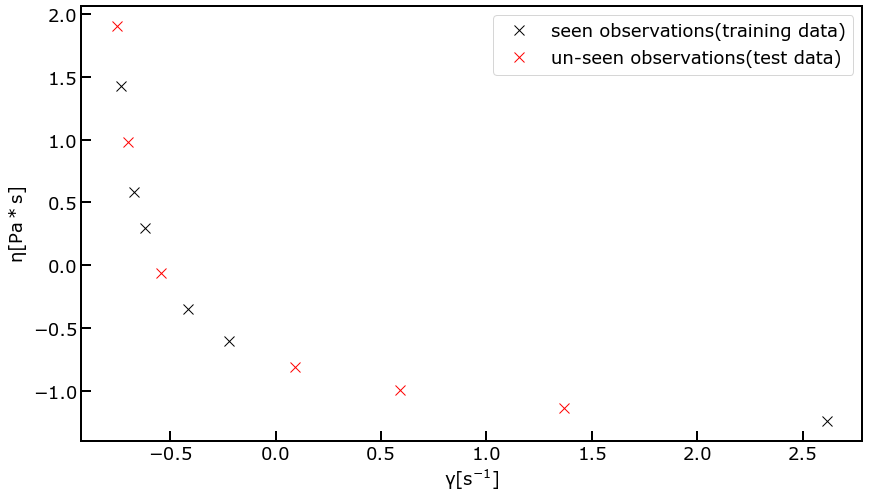

In [24]:
# Set up our plotting environment
plt.figure(figsize=(14, 8))

# Plot the training data in blue and the test data in red
plt.plot(scaled_X_train, scaled_Y_train, "kx", scaled_X_test, scaled_Y_test, "rx", ms = 10)
# plt.plot(scaled_X_grid, scaled_Y_grid, "g-");

# Annotate plot
plt.legend(labels=["seen observations(training data)", "un-seen observations(test data)"])
plt.xlabel(r"$\mathregular{\gamma[s^{-1}]}$")
plt.ylabel(r"$\mathregular{\eta[Pa*s]}$");

In [25]:
# k = GPy.kern.RBF(1, name="rbf")
k = GPy.kern.Linear(1) + GPy.kern.Exponential(1)

m = GPy.models.GPRegression(scaled_X_train, scaled_Y_train, k)

# m.optimize('bfgs', max_iters=100)
# Optimise hyperparameters 5 times to get a good estimate 
m.optimize_restarts(5, robust=True) # We could do this more times, but it can be quite time consuming
m

Optimization restart 1/5, f = 6.115128041392186
Optimization restart 2/5, f = 6.115128041396272
Optimization restart 3/5, f = 6.115128969993232
Optimization restart 4/5, f = 6.115128377579325
Optimization restart 5/5, f = 6.115128047850337


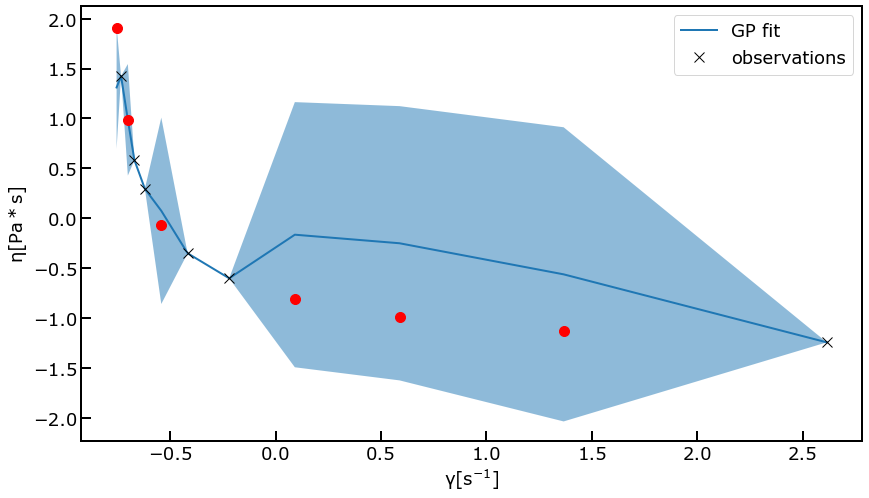

In [26]:
Xnew=np.vstack([scaled_X_train, scaled_X_test])
Xnew=np.sort(Xnew, axis =0)
mean, Cov = m.predict(Xnew, full_cov=True)

plt.figure(figsize=(14, 8))
plot_gp(Xnew, mean, Cov)
plt.plot(scaled_X_train, scaled_Y_train, "kx", ms=10);
plt.plot(scaled_X_test, scaled_Y_test, "ro", ms=10);

plt.legend(labels=["GP fit", "observations"]);
plt.xlabel(r"$\mathregular{\gamma[s^{-1}]}$")
plt.ylabel(r"$\mathregular{\eta[Pa*s]}$");

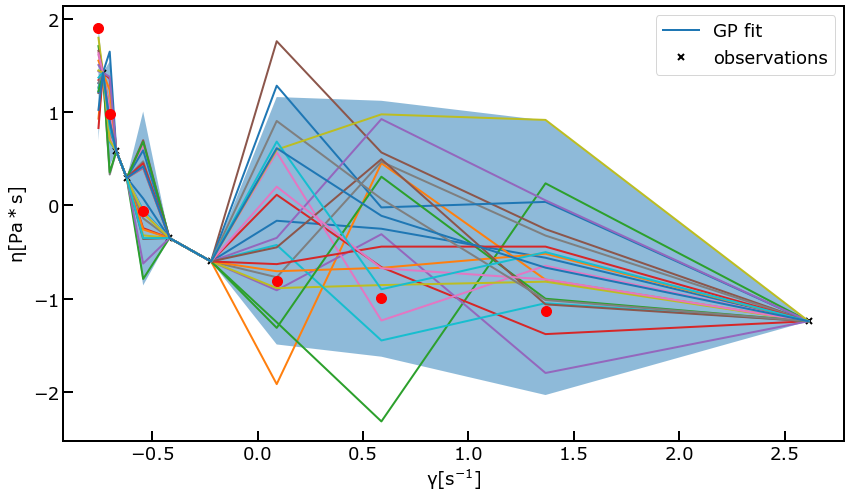

In [27]:
mean, Cov = m.predict_noiseless(scaled_X, full_cov=True)
Z  = np.random.multivariate_normal(mean.ravel(), Cov, 20).T
plt.figure(figsize = (14,8))
plot_gp(scaled_X, mean, Cov, training_points=(scaled_X_train,scaled_Y_train))
plt.plot(scaled_X,Z);
plt.plot(scaled_X_test, scaled_Y_test, "ro", ms=10);
plt.xlabel(r"$\mathregular{\gamma[s^{-1}]}$")
plt.ylabel(r"$\mathregular{\eta[Pa*s]}$");

In [28]:
# Effectively remove noise parameter (needs to be >0, so select value that is very low)
m.Gaussian_noise.variance = 0.00001
m.Gaussian_noise.variance.fix()

# We will fix the variance as well, so that only the lengthscale is optimised
# m.rbf.variance = 10.
m.variance = 10.

# m.rbf.variance.fix()
#m.variance.fix()

# This should minimize the lengthscale to fit closely to the training points
m.optimize()
m

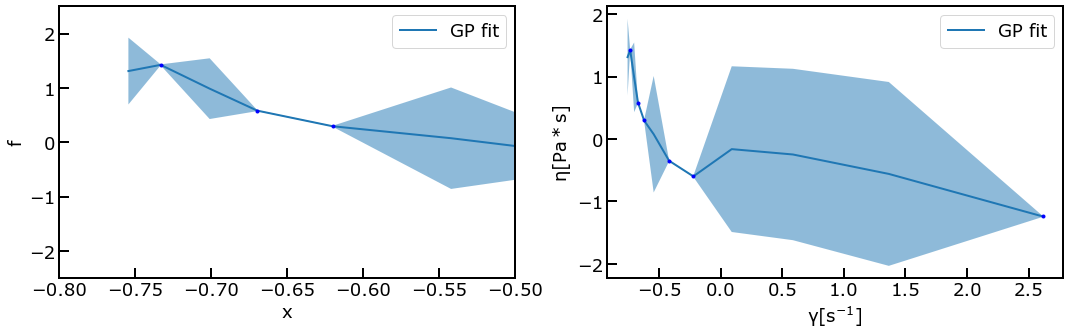

In [29]:
mean, Cov = m.predict(Xnew, full_cov=True)

plt.figure(figsize=(18, 5))

# The left plot shows the GP fit to a subsample of our training set
plt.subplot(121)
plot_gp(Xnew, mean, Cov)
plt.plot(scaled_X_train, scaled_Y_train, "b.");
plt.gca().set_xlim([-0.8,-0.5]), plt.gca().set_ylim([-2.5, 2.5])

# The right plot shows that the GP has no predictive power and reverts to 0
plt.subplot(122)
plot_gp(Xnew, mean, Cov)
plt.plot(scaled_X_train, scaled_Y_train, "b.");

plt.xlabel(r"$\mathregular{\gamma[s^{-1}]}$")
plt.ylabel(r"$\mathregular{\eta[Pa*s]}$");

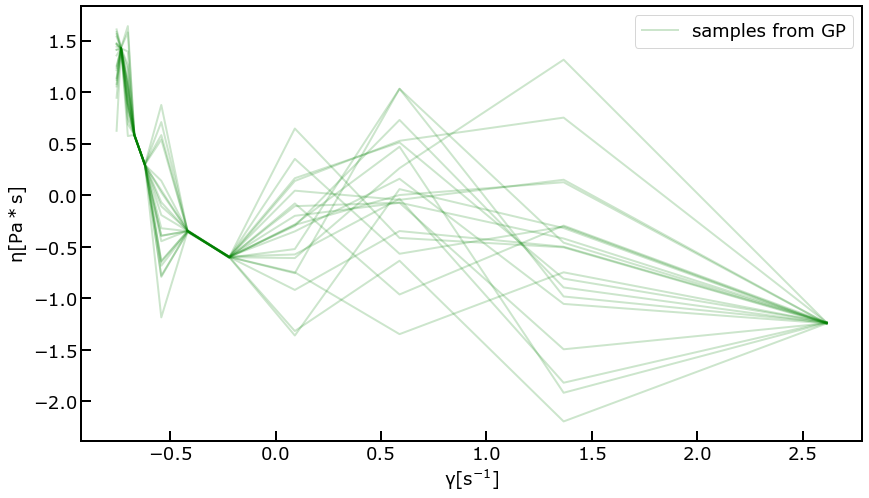

In [30]:
plt.figure(figsize=(14,8))

# plt.plot(Xnew, f(Xnew),"r:", lw=3)

Z  = np.random.multivariate_normal(mean[:,0], Cov, 20)
for z in Z:
    plt.plot(Xnew,z, "g-", alpha=0.2)
    
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["samples from GP"]);
plt.xlabel(r"$\mathregular{\gamma[s^{-1}]}$")
plt.ylabel(r"$\mathregular{\eta[Pa*s]}$");

# Part II: Multi-fidelity Modeling

The linear multi-fidelity model proposed in [[Kennedy and O'Hagan, 2000]](#3.-References) is widely viewed as a reference point for all such models.
In this model, the high-fidelity (true) function is modeled as a scaled sum of the low-fidelity function plus an error term:

$$
f_{high}(x) = f_{err}(x) + \rho \,f_{low}(x)
$$

In this equation, $f_{low}(x)$ is taken to be a Gaussian process modeling the outputs of the lower fidelity function, while $\rho$ is a scaling factor indicating the magnitude of the correlation to the high-fidelity data.
Setting this to 0 implies that there is no correlation between observations at different fidelities.
Meanwhile, $f_{err}(x)$ denotes yet another Gaussian process which models the bias term for the high-fidelity data.
Note that $f_{err}(x)$ and $f_{low}(x)$ are assumed to be independent processes which are only related by the equation given above.

>**Note**: While we shall limit our explanation to the case of two fidelities, this set-up can easily be generalized to cater for $T$ fidelities as follows:
>
>$$f_{t}(x) = f_{t}(x) + \rho_{t-1} \,f_{t-1}(x), \quad t=1,\dots, T$$


If the training points are sorted such that the low and high-fidelity points are grouped together:

$$
\begin{pmatrix}
X_{low} \\
X_{high}
\end{pmatrix}
$$

we can express the model as a single Gaussian process having the following prior:

$$
\begin{bmatrix}
f_{low}\left(h\right)\\
f_{high}\left(h\right)
\end{bmatrix}
\sim
GP
\begin{pmatrix}
\begin{bmatrix}
0 \\ 0
\end{bmatrix},
\begin{bmatrix}
k_{low} & \rho k_{low} \\
\rho k_{low} & \rho^2 k_{low} + k_{err}
\end{bmatrix}
\end{pmatrix}
$$

In [126]:
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel

## Generate samples from the Forrester function

high_fidelity = emukit.test_functions.forrester.forrester
low_fidelity = emukit.test_functions.forrester.forrester_low

x_plot = np.linspace(0, 1, 200)[:, None]
y_plot_l = low_fidelity(x_plot)
y_plot_h = high_fidelity(x_plot)

x_train_l = np.atleast_2d(np.random.rand(12)).T
x_train_h = np.atleast_2d(np.random.permutation(x_train_l)[:6])
y_train_l = low_fidelity(x_train_l)
y_train_h = high_fidelity(x_train_h)

In [127]:
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays

In [128]:
X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], [y_train_l, y_train_h])

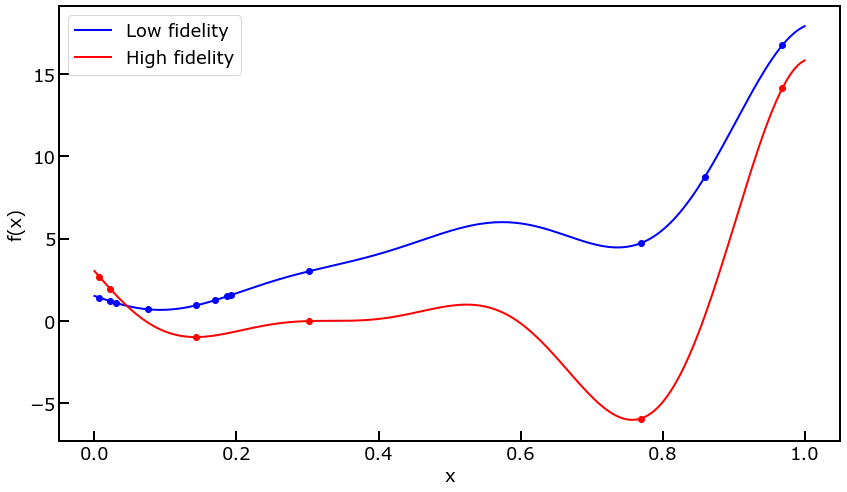

In [129]:
## Plot the original functions

plt.figure(figsize=(14, 8))
plt.plot(x_plot, y_plot_l, 'b')
plt.plot(x_plot, y_plot_h, 'r')
plt.scatter(x_train_l, y_train_l, color='b')
plt.scatter(x_train_h, y_train_h, color='r')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(['Low fidelity', 'High fidelity']);

In [130]:
## Construct a linear multi-fidelity model

kernels = [GPy.kern.RBF(1), GPy.kern.RBF(1)]
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)
gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)
gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)


## Wrap the model using the given 'GPyMultiOutputWrapper'

lin_mf_model = model = GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=5)

## Fit the model
  
lin_mf_model.optimize()

Optimization restart 1/5, f = 10.794597524063354
Optimization restart 2/5, f = 10.794597430701545
Optimization restart 3/5, f = 10.794597259398504
Optimization restart 4/5, f = -11.635021781784037
Optimization restart 5/5, f = 10.794598171447836


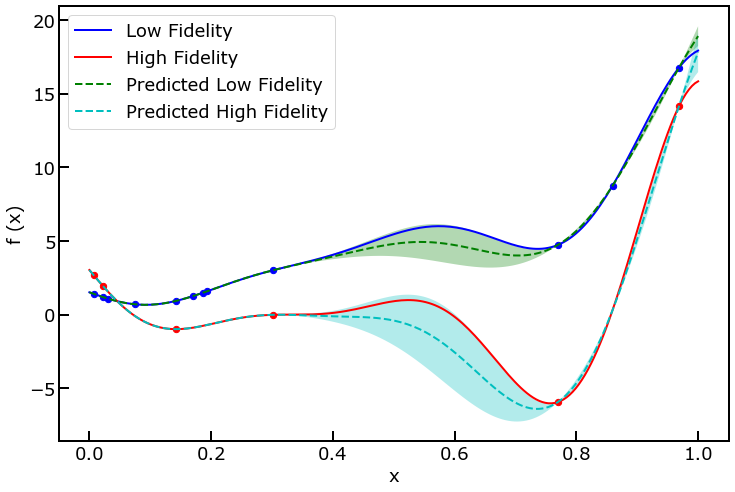

In [131]:
## Convert x_plot to its ndarray representation

X_plot = convert_x_list_to_array([x_plot, x_plot])
X_plot_l = X_plot[:len(x_plot)]
X_plot_h = X_plot[len(x_plot):]

## Compute mean predictions and associated variance

lf_mean_lin_mf_model, lf_var_lin_mf_model = lin_mf_model.predict(X_plot_l)
lf_std_lin_mf_model = np.sqrt(lf_var_lin_mf_model)
hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)
hf_std_lin_mf_model = np.sqrt(hf_var_lin_mf_model)


## Plot the posterior mean and variance

plt.figure(figsize=(12, 8))
plt.fill_between(x_plot.flatten(), (lf_mean_lin_mf_model - 1.96*lf_std_lin_mf_model).flatten(), 
                 (lf_mean_lin_mf_model + 1.96*lf_std_lin_mf_model).flatten(), facecolor='g', alpha=0.3)
plt.fill_between(x_plot.flatten(), (hf_mean_lin_mf_model - 1.96*hf_std_lin_mf_model).flatten(), 
                 (hf_mean_lin_mf_model + 1.96*hf_std_lin_mf_model).flatten(), facecolor='c', alpha=0.3)

plt.plot(x_plot, y_plot_l, 'b')
plt.plot(x_plot, y_plot_h, 'r')
plt.plot(x_plot, lf_mean_lin_mf_model, '--', color='g')
plt.plot(x_plot, hf_mean_lin_mf_model, '--', color='c')
plt.scatter(x_train_l, y_train_l, color='b', s=40)
plt.scatter(x_train_h, y_train_h, color='r', s=40)
plt.ylabel('f (x)')
plt.xlabel('x')
plt.legend(['Low Fidelity', 'High Fidelity', 'Predicted Low Fidelity', 'Predicted High Fidelity']);

The above plot demonstrates how the multi-fidelity model learns the relationship between the low and high-fidelity observations in order to model both of the corresponding functions.
In this example, the posterior mean almost fits the true function exactly, while the associated uncertainty returned by the model is also appropriately small given the good fit.

In [132]:
## Create standard GP model using only high-fidelity data

kernel = GPy.kern.RBF(1)
high_gp_model = GPy.models.GPRegression(x_train_h, y_train_h, kernel)
high_gp_model.Gaussian_noise.fix(0)

## Fit the GP model

high_gp_model.optimize_restarts(5)

## Compute mean predictions and associated variance

hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(x_plot)
hf_std_hf_gp_model = np.sqrt(hf_var_high_gp_model)

Optimization restart 1/5, f = 17.719665127738793
Optimization restart 2/5, f = 17.719665127729304
Optimization restart 3/5, f = 17.71966512772646
Optimization restart 4/5, f = 17.719665127729787
Optimization restart 5/5, f = 17.719665127887218


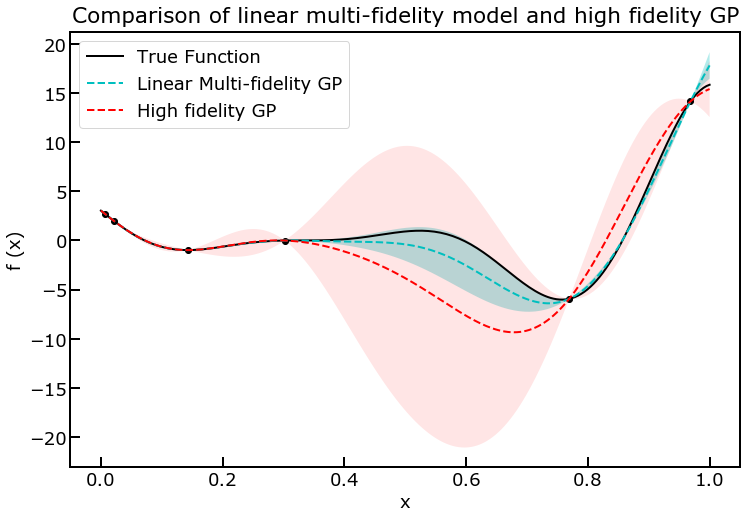

In [133]:
## Plot the posterior mean and variance for the high-fidelity GP model

plt.figure(figsize=(12, 8))

plt.fill_between(x_plot.flatten(), (hf_mean_lin_mf_model - 1.96*hf_std_lin_mf_model).flatten(), 
                 (hf_mean_lin_mf_model + 1.96*hf_std_lin_mf_model).flatten(), facecolor='c', alpha=0.3)
plt.fill_between(x_plot.flatten(), (hf_mean_high_gp_model - 1.96*hf_std_hf_gp_model).flatten(), 
                 (hf_mean_high_gp_model + 1.96*hf_std_hf_gp_model).flatten(), facecolor='r', alpha=0.1)

plt.plot(x_plot, y_plot_h, color='k')
plt.plot(x_plot, hf_mean_lin_mf_model, '--', color='c')
plt.plot(x_plot, hf_mean_high_gp_model, 'r--')
plt.scatter(x_train_h, y_train_h, color='k')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.legend(['True Function', 'Linear Multi-fidelity GP', 'High fidelity GP'])
plt.title('Comparison of linear multi-fidelity model and high fidelity GP');

In the absence of such a multi-fidelity model, a regular Gaussian process would have been fit exclusively to the high fidelity data.
As illustrated in the figure below, the resulting Gaussian process posterior yields a much worse fit to the data than that obtained by the multi-fidelity model.
The uncertainty estimates are also poorly calibrated.

# Part III:  Active Learning

## Choose a function to benchmark




In [36]:
from emukit.test_functions import forrester_function
from emukit.core.loop.user_function import UserFunctionWrapper
from emukit.core import ContinuousParameter, ParameterSpace

In [37]:
target_function, space = forrester_function()
x_plot = np.linspace(space.parameters[0].min, space.parameters[0].max, 301)[:, None]
y_plot = target_function(x_plot)

Text(0, 0.5, 'f(x)')

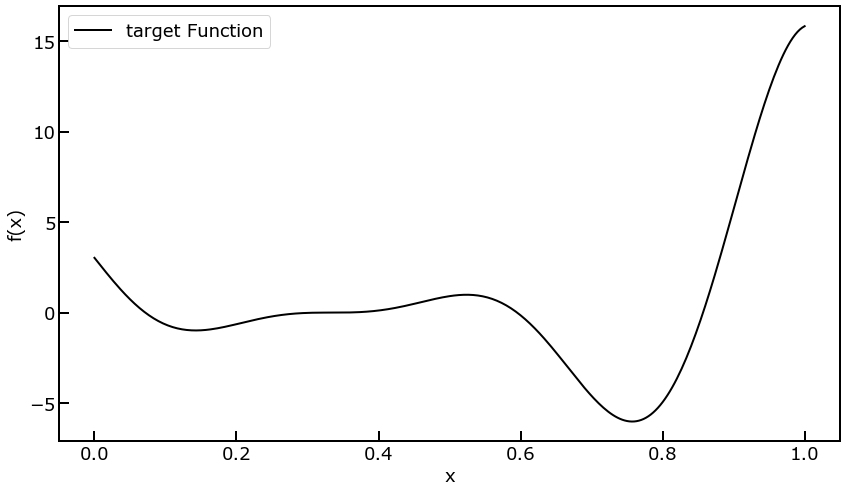

In [38]:
plt.figure(figsize=(14,8))

plt.plot(x_plot, y_plot, 'k', label='target Function', linewidth=2)

plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('f(x)')

## Initial Design

Usually, before we start the actual ExpDesign loop we need to gather a
few observations such that we can fit the model. This is called the
initial design and common strategies are either a predefined grid or
sampling points uniformly at random.

In [39]:
X_init = np.array([[0.2],[0.6], [0.9]])
Y_init = target_function(X_init)

Text(0, 0.5, 'f(x)')

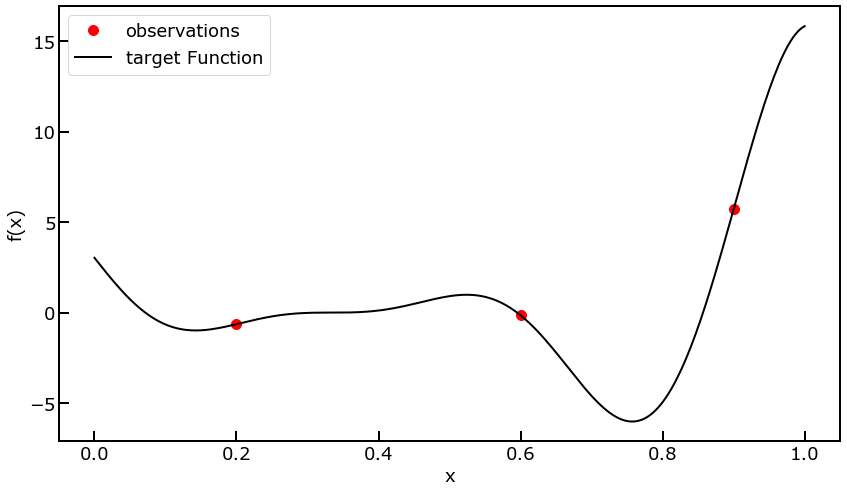

In [40]:
plt.figure(figsize=(14, 8))
plt.plot(X_init, Y_init, 'ro', ms=10, label='observations')
plt.plot(x_plot, y_plot, 'k', label='target Function', linewidth=2)
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('f(x)')

In [41]:
import GPy
from emukit.model_wrappers.gpy_model_wrappers import GPyModelWrapper

Now we set up the covariance function for the GPy model, initialising it
with a lengthscale, $\ell=0.08$, and a variance, $\alpha=20$.

In [42]:
kern = GPy.kern.RBF(1, lengthscale=0.08, variance=20)
gpy_model = GPy.models.GPRegression(X_init, Y_init, kern, noise_var=1e-10)
emukit_model = GPyModelWrapper(gpy_model)

mu_plot, var_plot = emukit_model.predict(x_plot)

In [43]:
import matplotlib.pyplot as plt

from matplotlib import colors as mcolors
from matplotlib import cm

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [44]:
def helper_plot_emulator_errorbars():
    """Helper function for plotting the emulator fit."""
    ax.plot(emukit_model.X, emukit_model.Y, 'ro', markersize=10, label='observations')
    ax.plot(x_plot, mu_plot, 'C0', label='model', linewidth=3)
    ax.plot(x_plot, y_plot, 'k', label='target function', linewidth=2)
    ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color='C0', alpha=0.6)
    ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 2 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 2 * np.sqrt(var_plot)[:, 0], color='C0', alpha=0.4)
    ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 3 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 3 * np.sqrt(var_plot)[:, 0], color='C0', alpha=0.2)
    ax.legend(loc=2)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_xlim(-0.01, 1)
    ax.set_ylim([-20, 20])

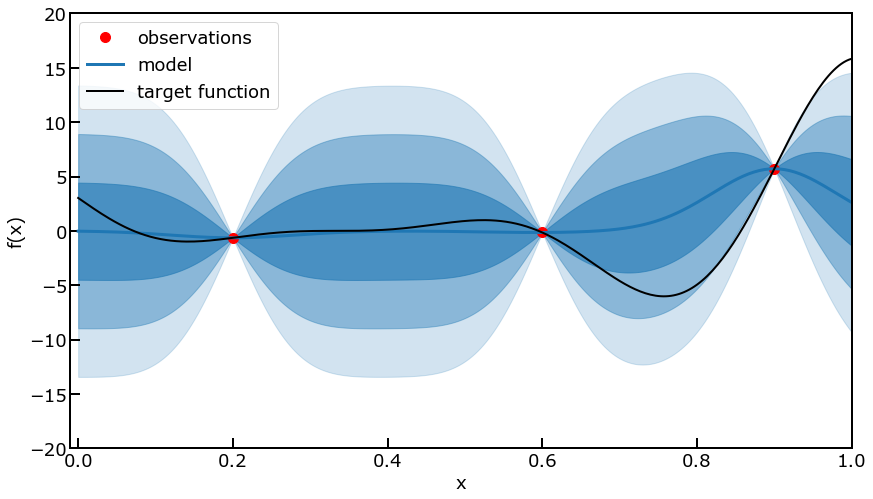

In [45]:
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()

## The Acquisition Function

In the second step of our ExpDesign loop we use our model to compute the
acquisition function. We’ll review two different forms of acquisition
funciton for doing this.

### Uncertainty Sampling

In uncertainty sampling (US) we hoose the next value $\mathbf{ x}_{n+1}$
at the location where the model on $f(\mathbf{ x})$ has the highest
marginal predictive variance $$
a_{US}(\mathbf{ x}) = \sigma^2(\mathbf{ x}).
$$ This makes sure, that we learn the function $f(\cdot)$ everywhere on
$\mathbb{X}$ to a similar level of absolute error.


In [46]:
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance

us_acquisition = ModelVariance(emukit_model)
ivr_acquisition = IntegratedVarianceReduction(emukit_model, space)

us_plot = us_acquisition.evaluate(x_plot)
ivr_plot = ivr_acquisition.evaluate(x_plot)

(-0.01, 1)

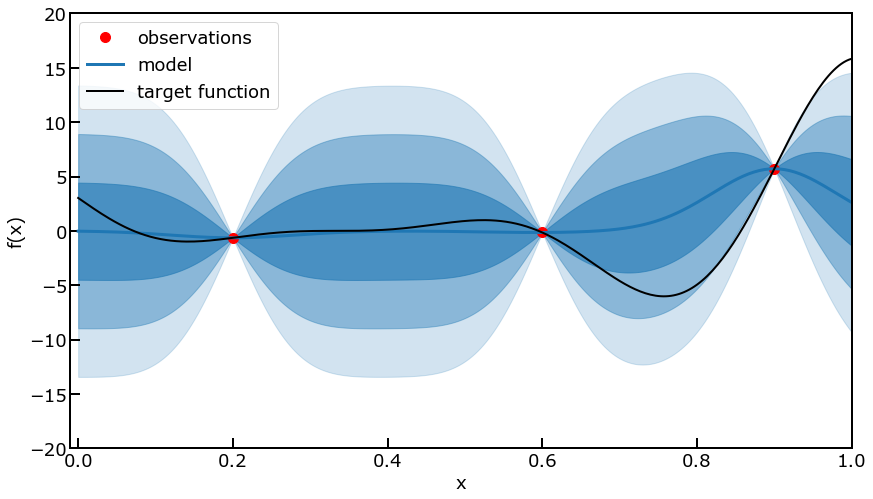

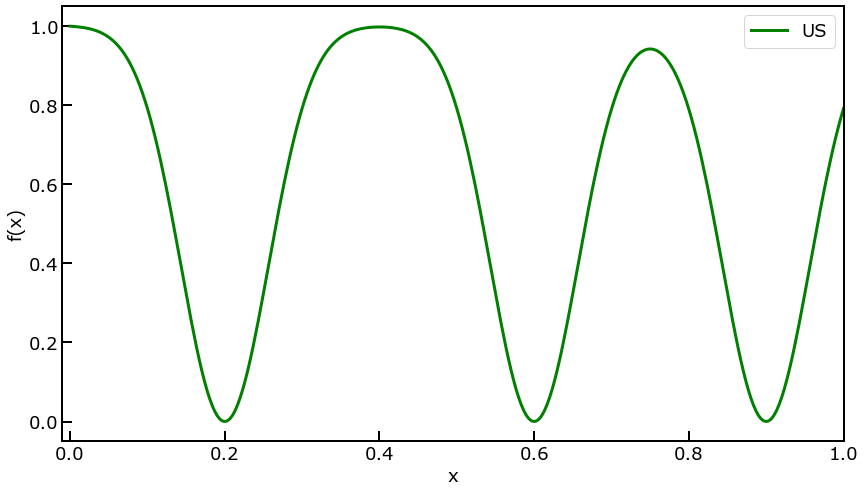

In [47]:
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(x_plot, us_plot / np.max(us_plot), 'green', label='US', linewidth=3)
# ax.plot(x_plot, ivr_plot / np.max(ivr_plot) , 'purple', label='IVR', linewidth=3)

ax.legend(loc=1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xlim(-0.01, 1)

## Next Candidate Point for Evaluation
To find the next point to evaluate we optimize the acquisition function
using a standard gradient descent optimizer.

In [48]:
from emukit.core.optimization import GradientAcquisitionOptimizer

In [49]:
def helper_plot_next_point_acquisition():
    """Helper code for plot the location of the next point acquisition."""
    ax.plot(x_plot, us_plot / np.max(us_plot), 'green', label='US', linewidth=3)
    ax.axvline(x_new, color='red', label='x_next', linestyle='--', linewidth=3)
    ax.legend(loc=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    ax.grid()
    ax.set_xlim(-0.01, 1)

In [50]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

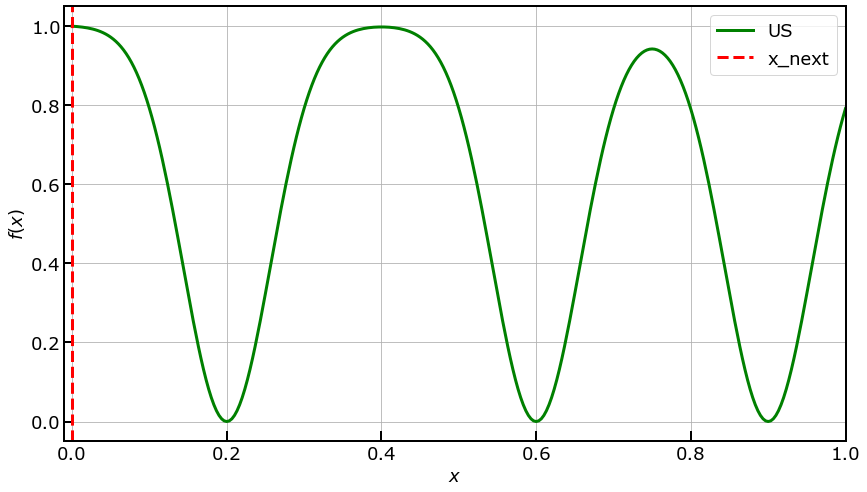

In [51]:
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

Afterwards we evaluate the true objective function and append it to our initial observations.

In [52]:
y_new = target_function(x_new)

X = np.append(X_init, x_new, axis=0)
Y = np.append(Y_init, y_new, axis=0)

emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

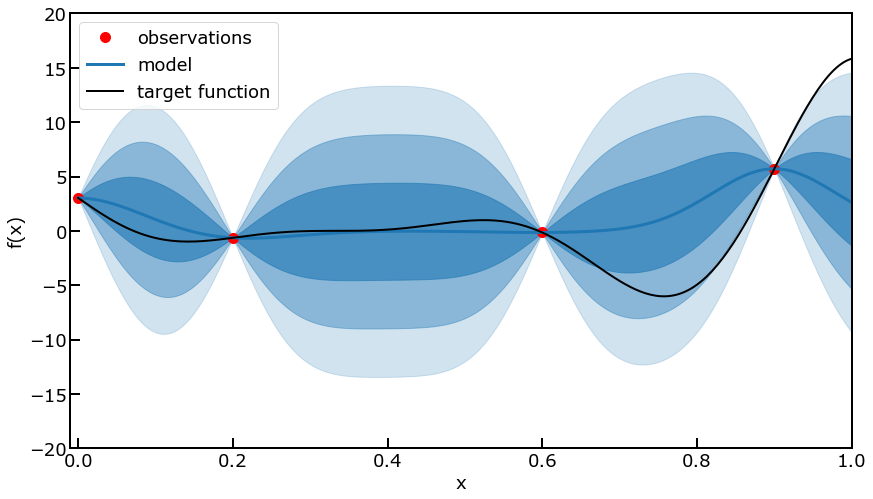

In [53]:
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()

Let's repeat this porcess to obtain more points and improve our belief

In [54]:
us_acquisition = ModelVariance(emukit_model)
us_plot = us_acquisition.evaluate(x_plot)
x_new, _ = optimizer.optimize(us_acquisition)

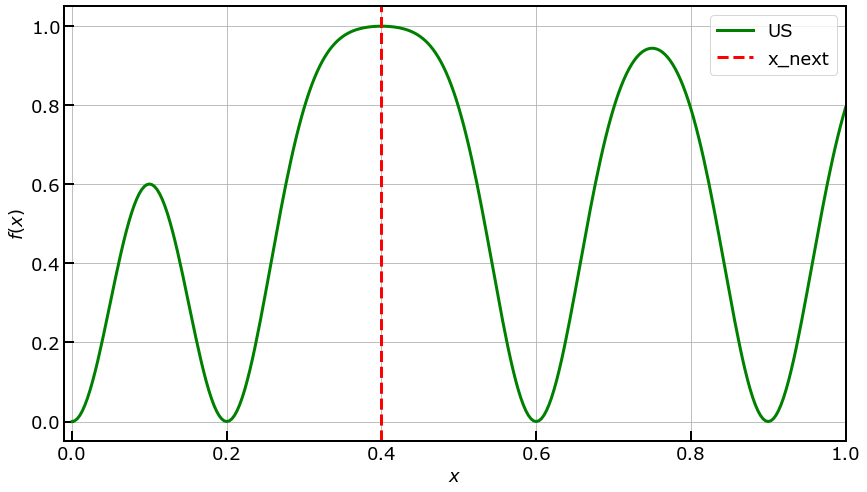

In [55]:
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

Once again we can asimmilate the new target function observation into
the model and re-evaluate our emulation.

In [56]:
y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

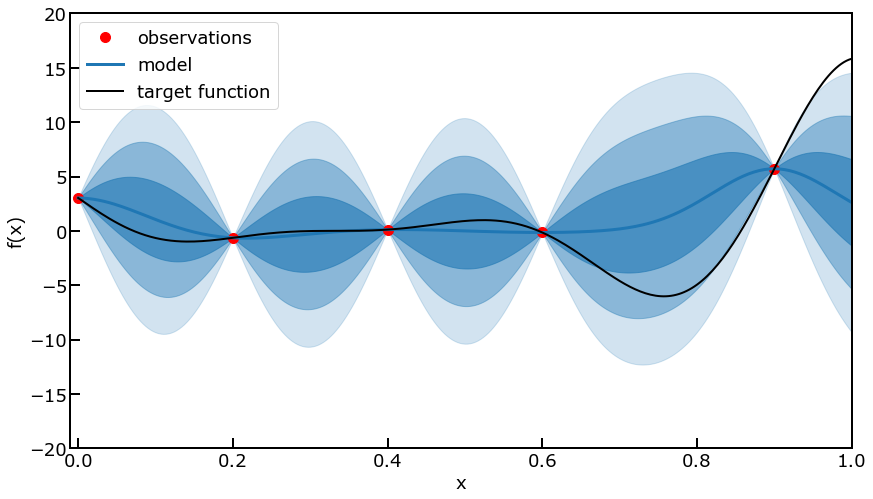

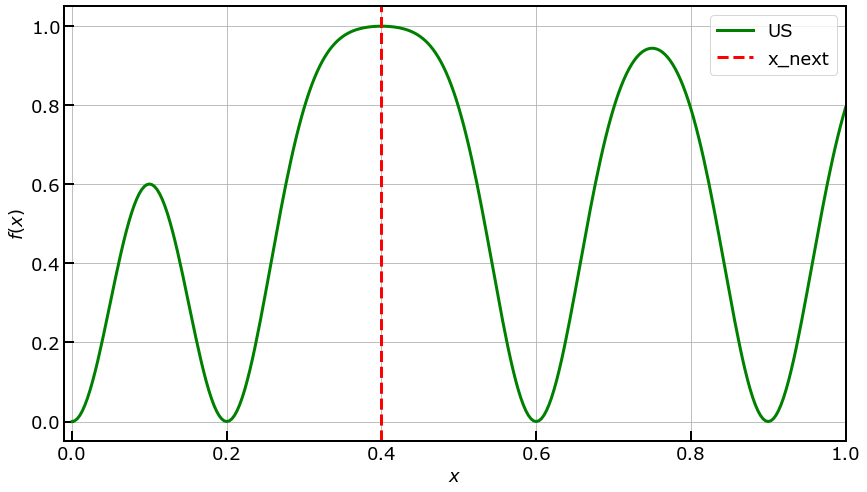

In [57]:
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

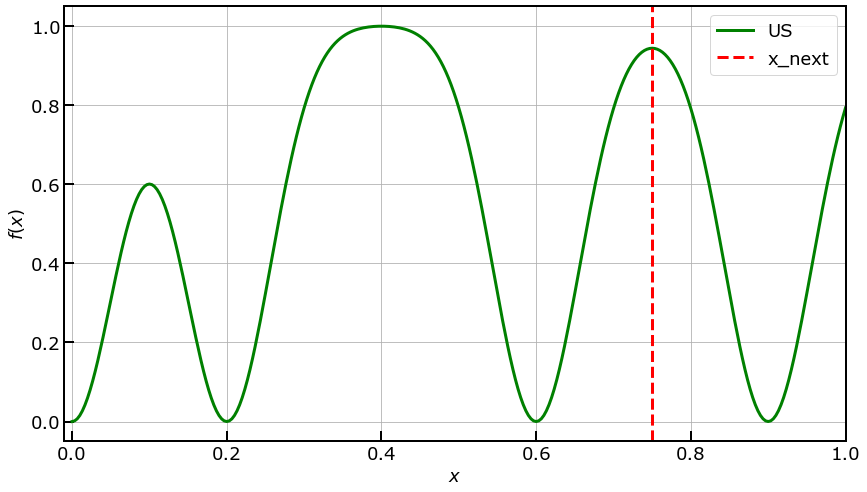

In [58]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

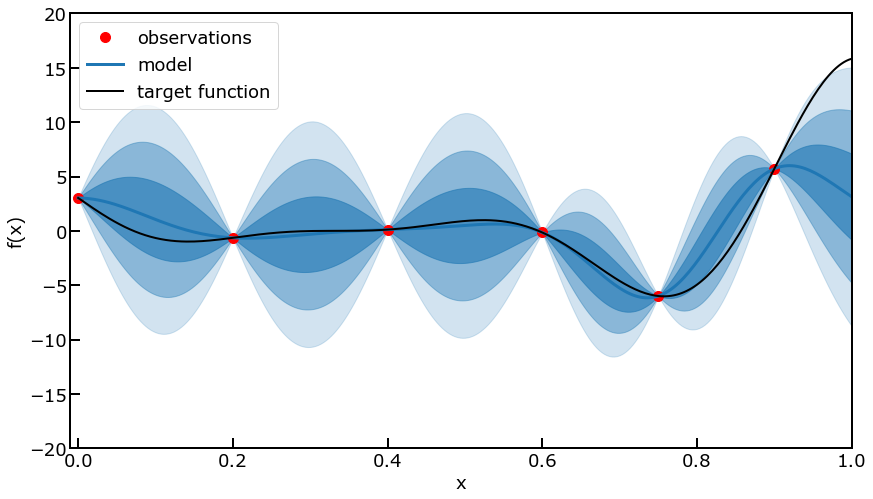

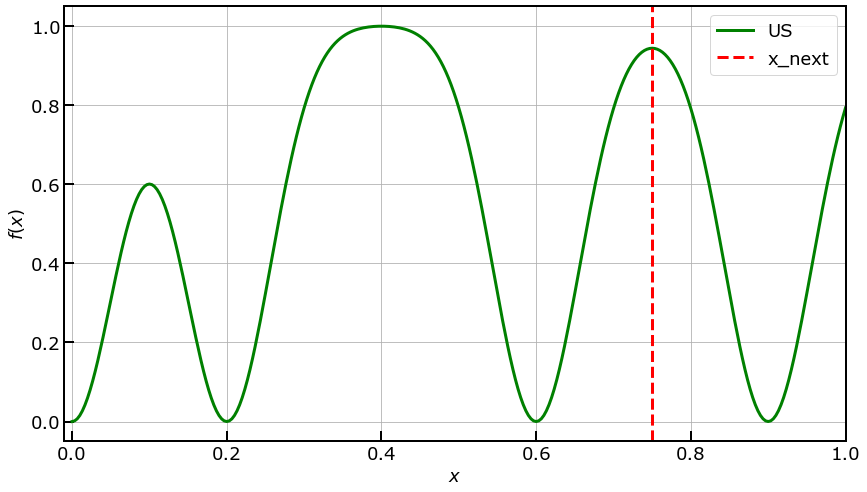

In [59]:
y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

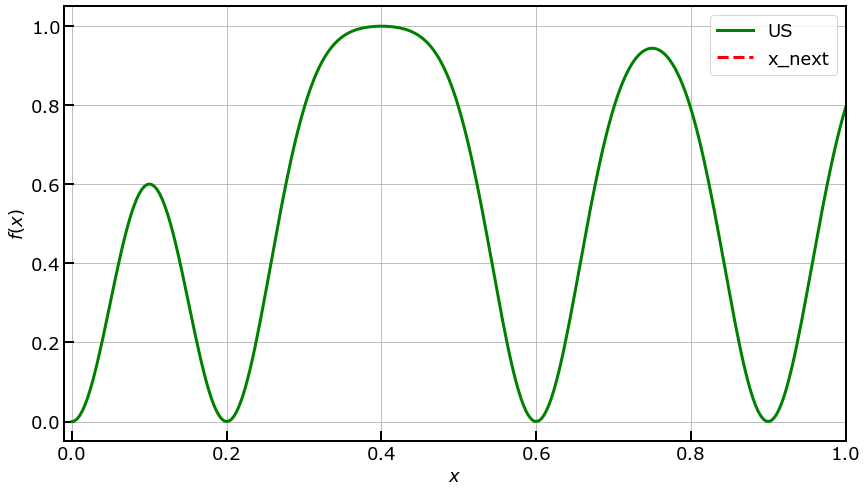

In [60]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

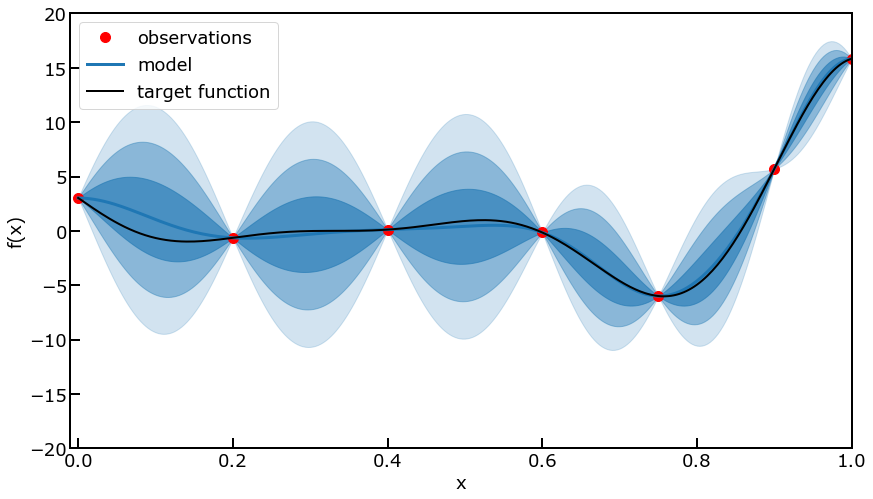

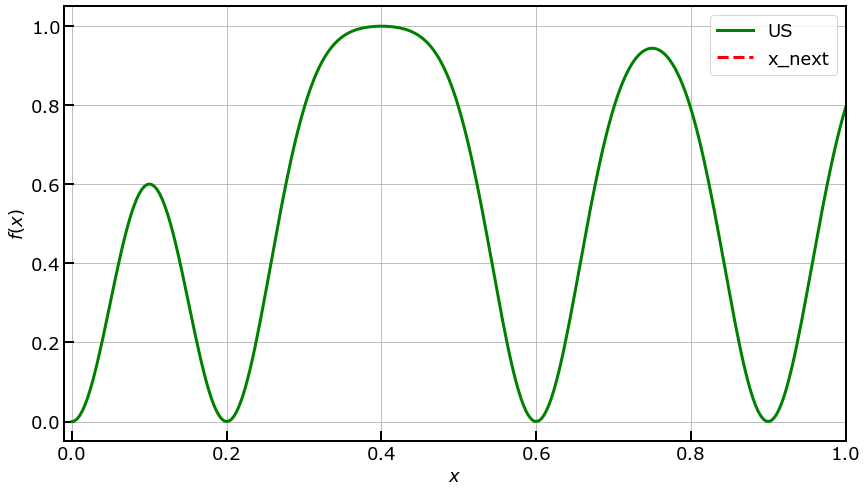

In [61]:
y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

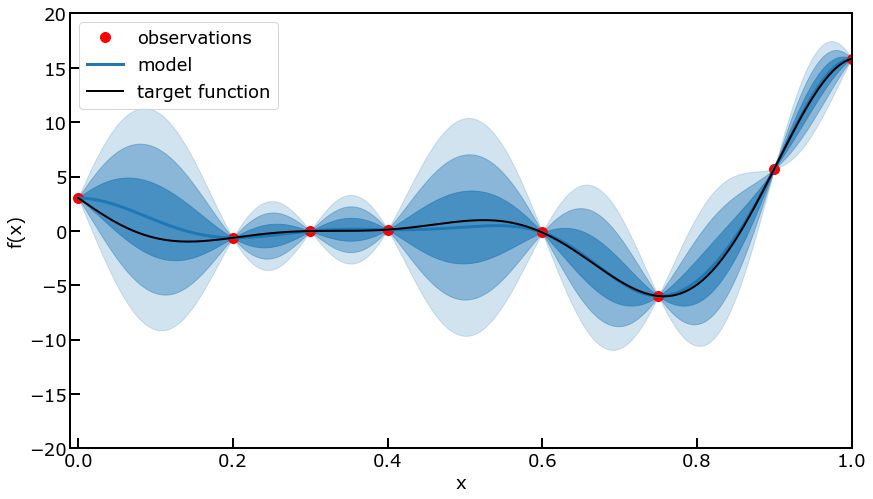

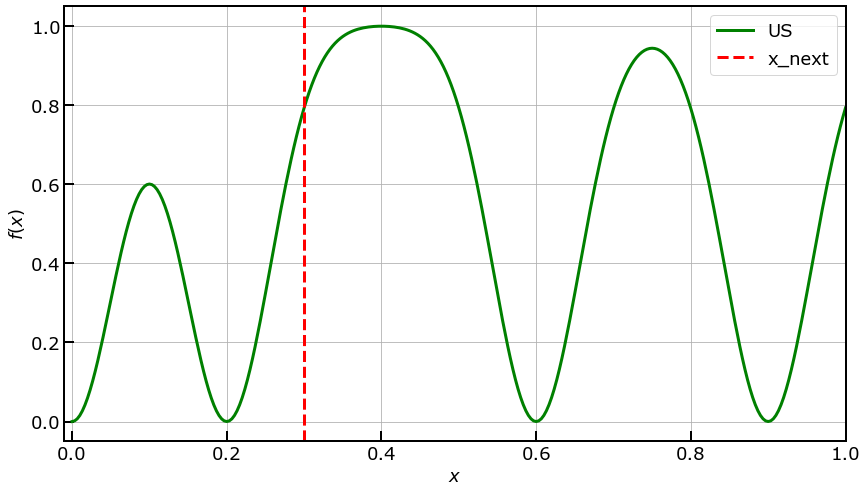

In [62]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

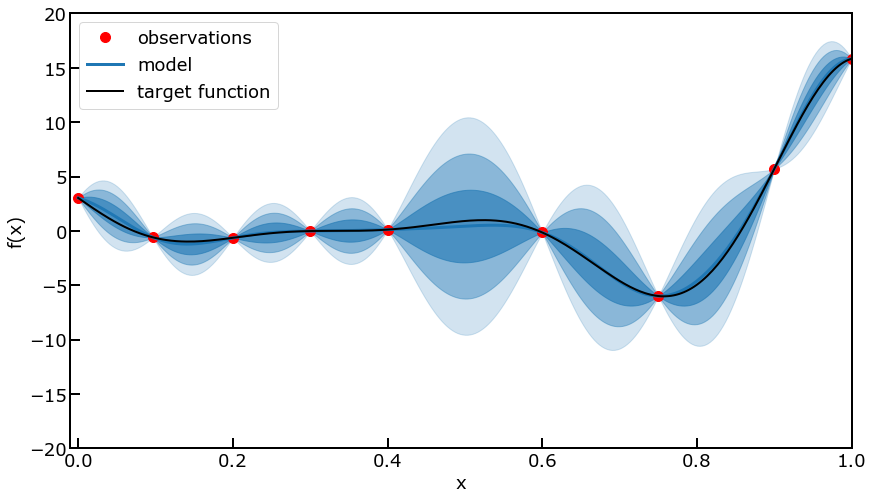

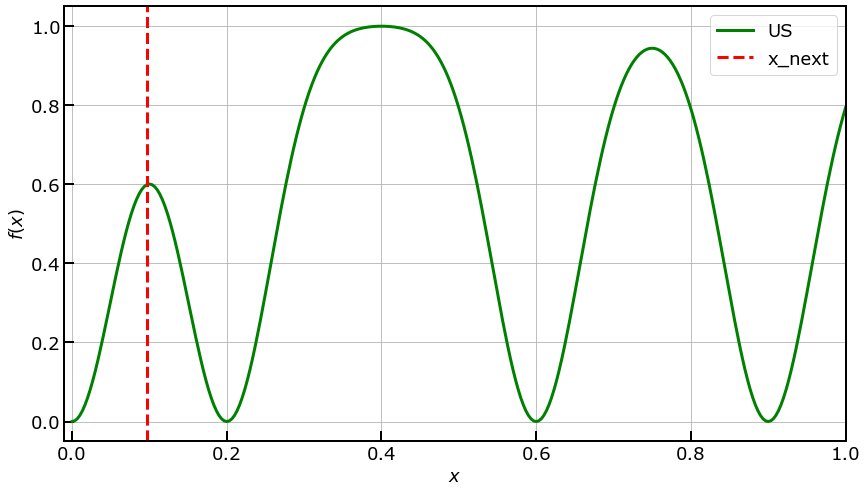

In [63]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

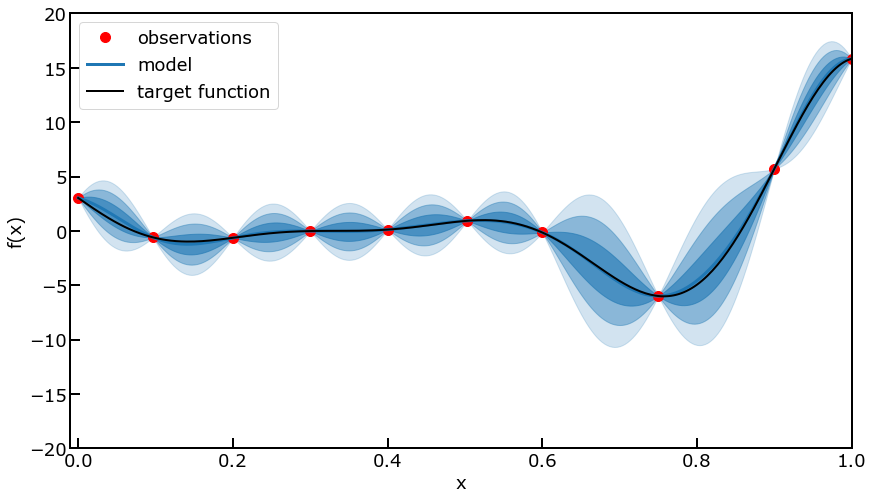

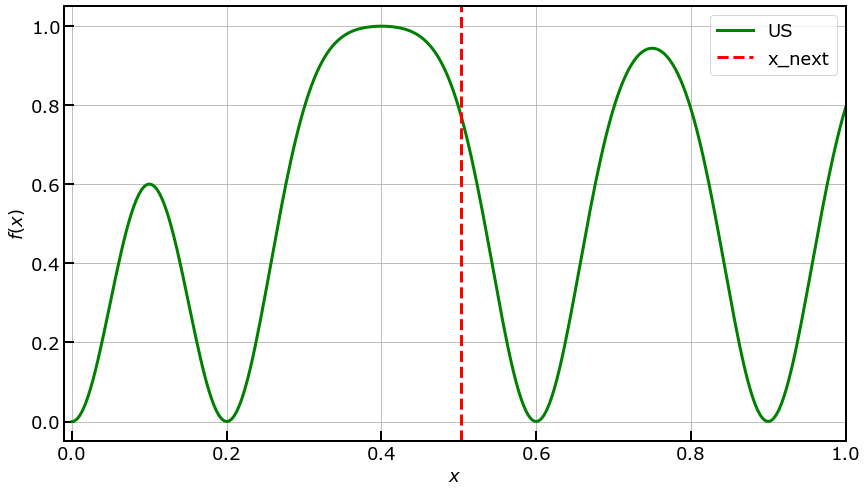

In [64]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

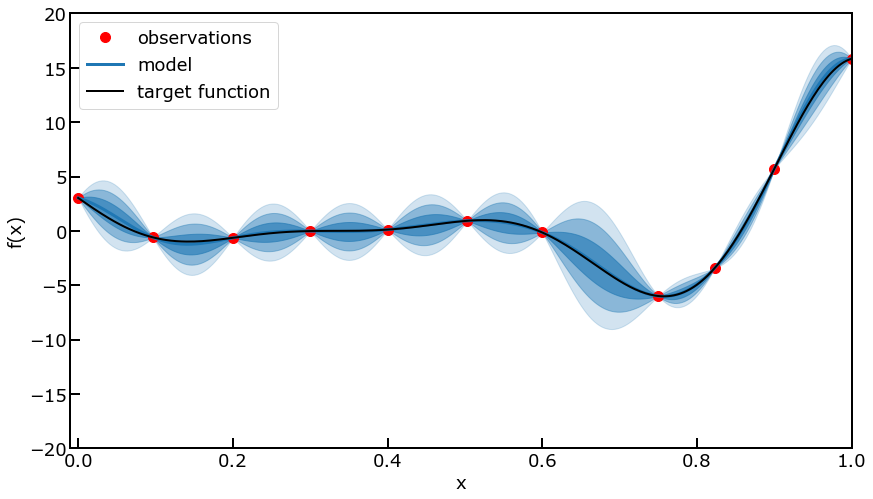

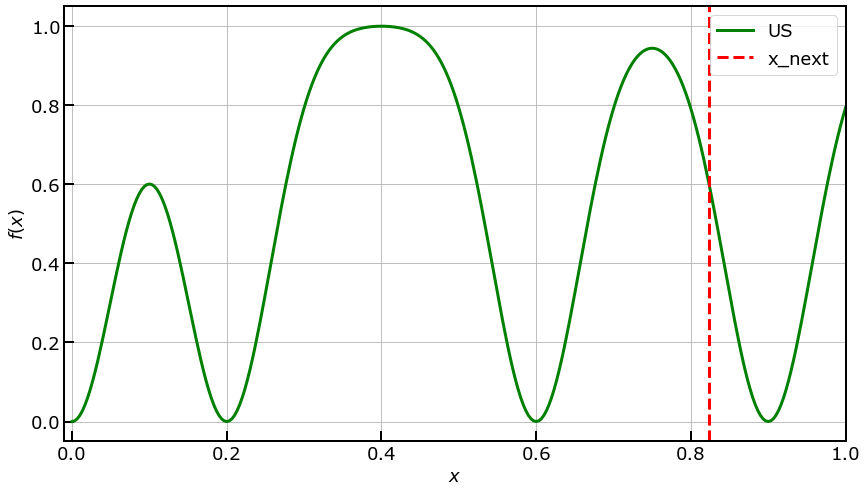

In [65]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

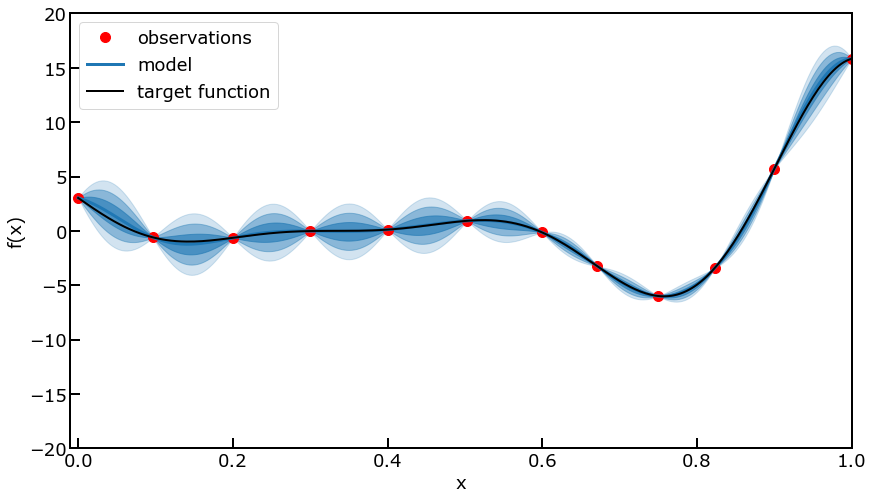

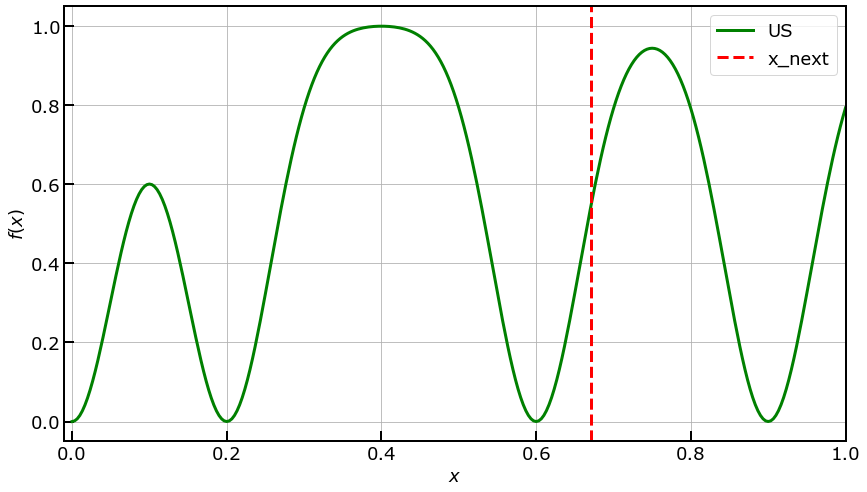

In [66]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

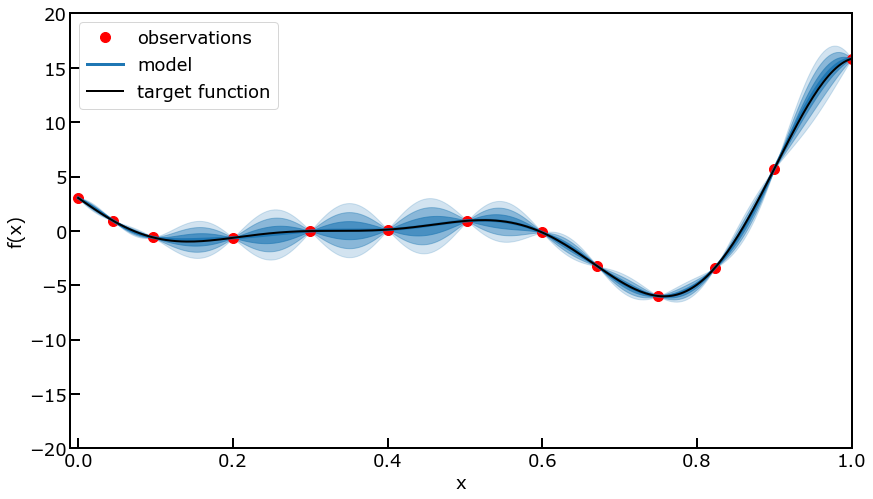

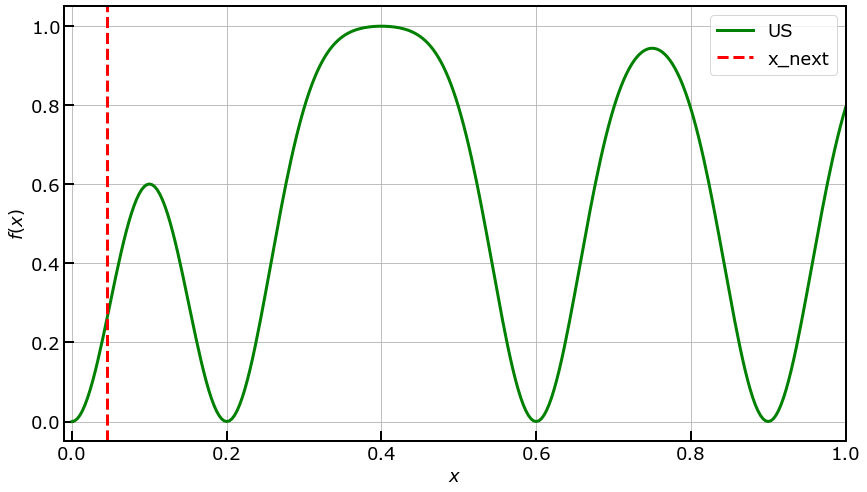

In [67]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

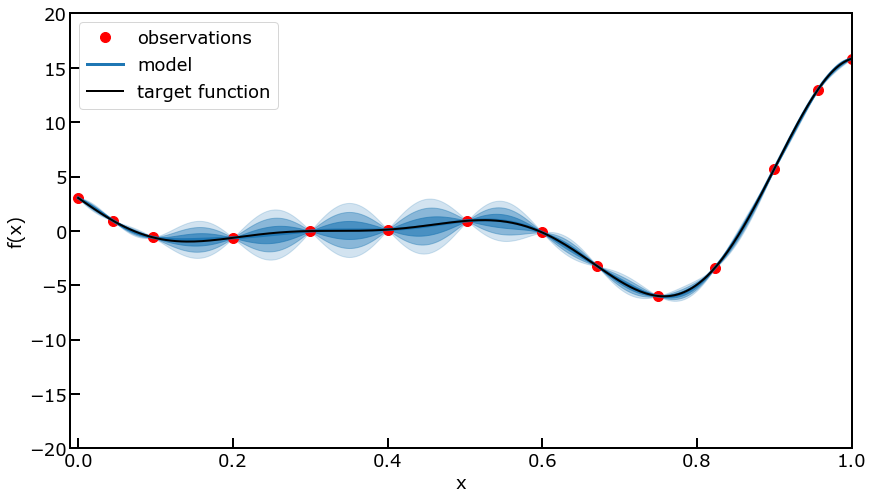

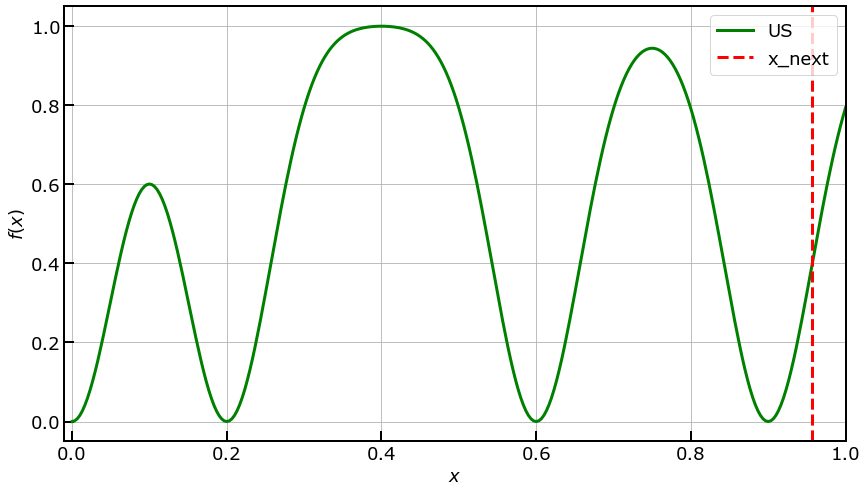

In [68]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

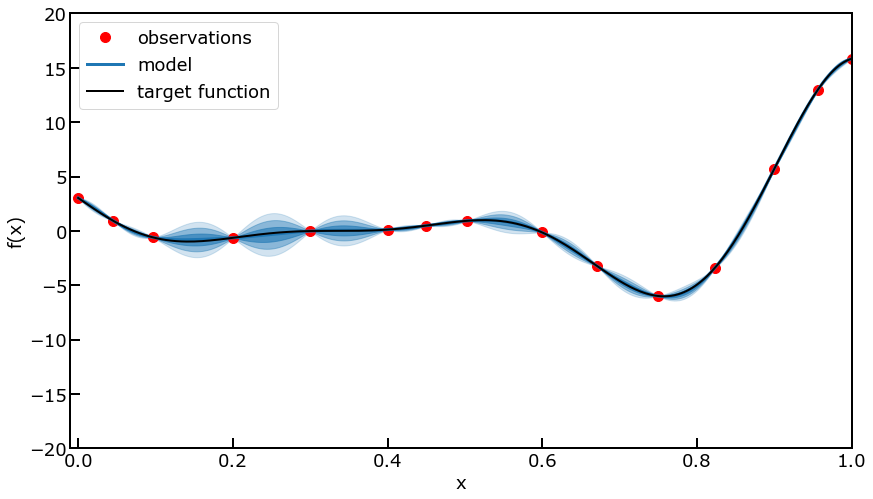

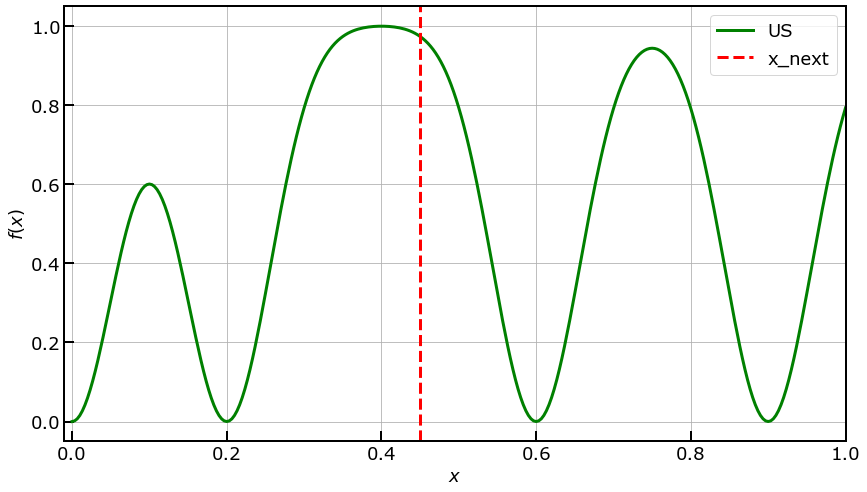

In [69]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

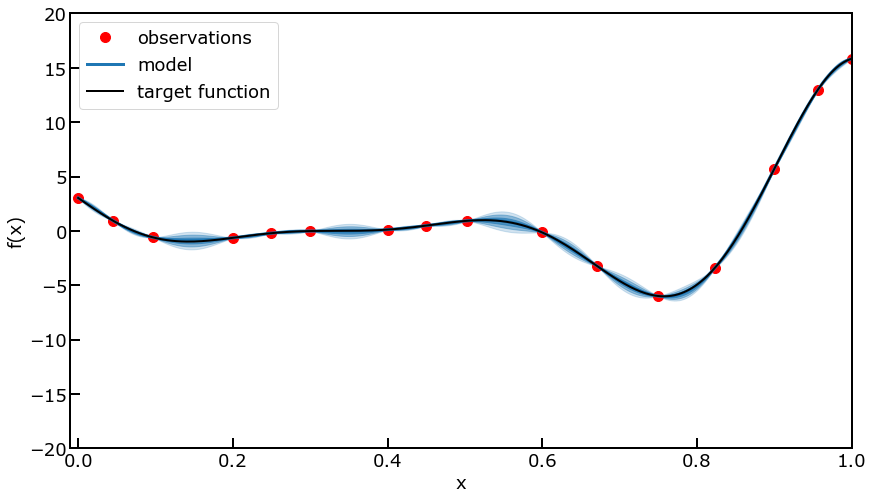

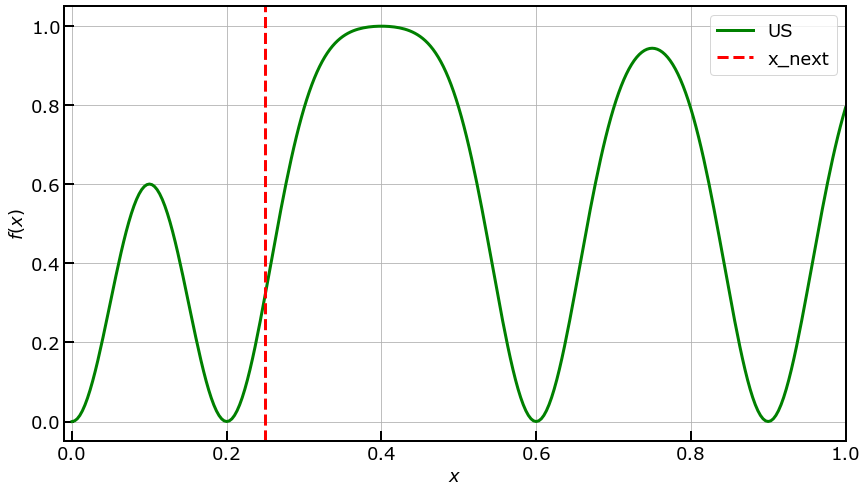

In [70]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

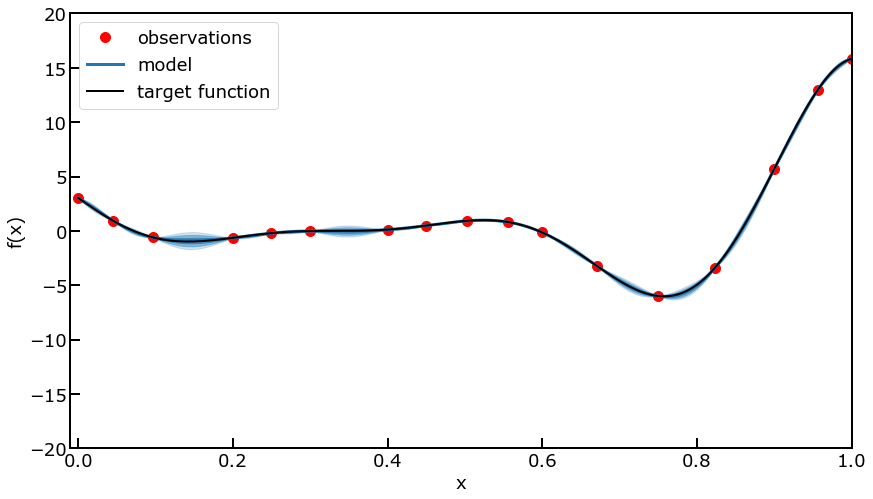

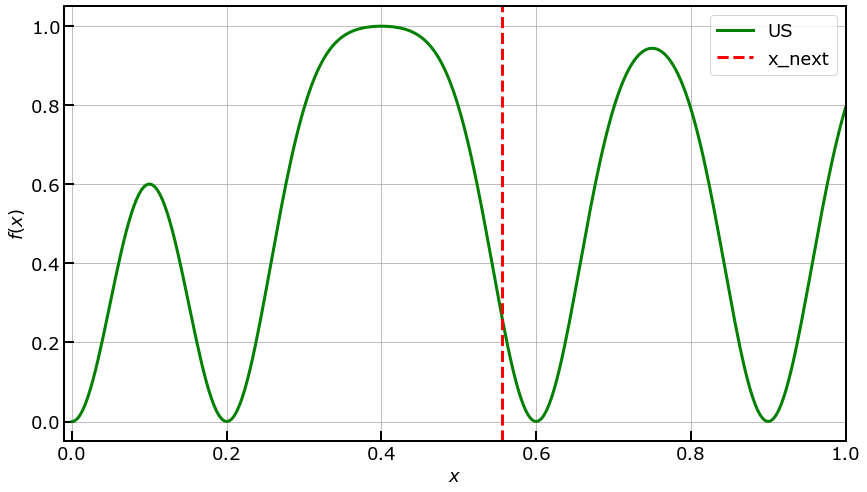

In [71]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

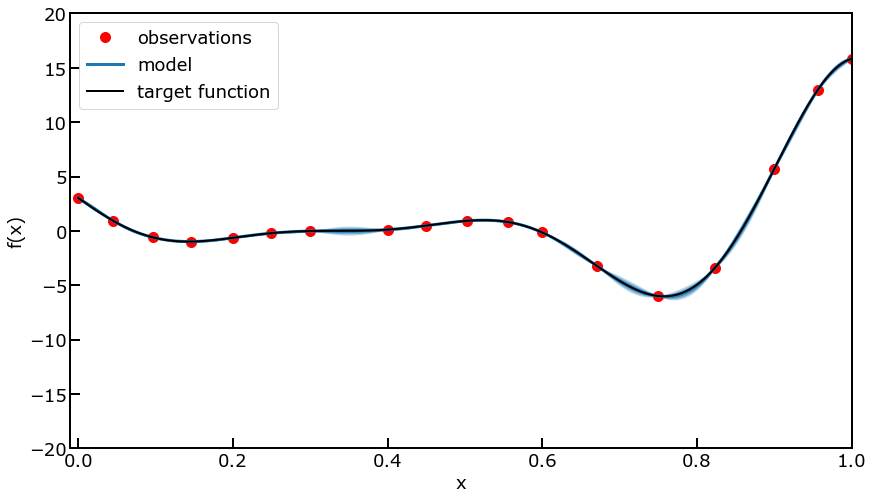

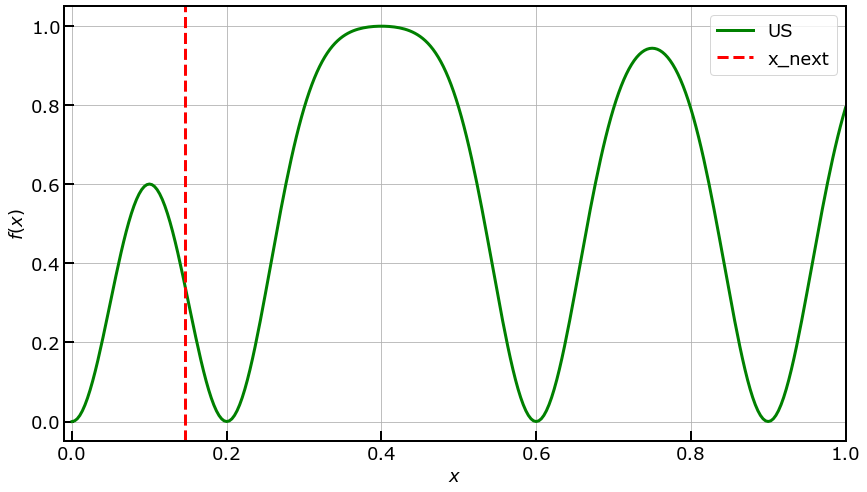

In [72]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

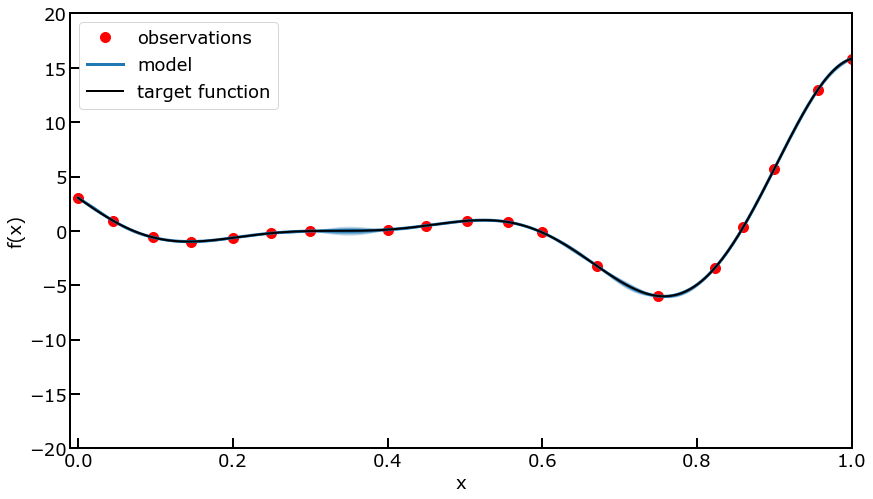

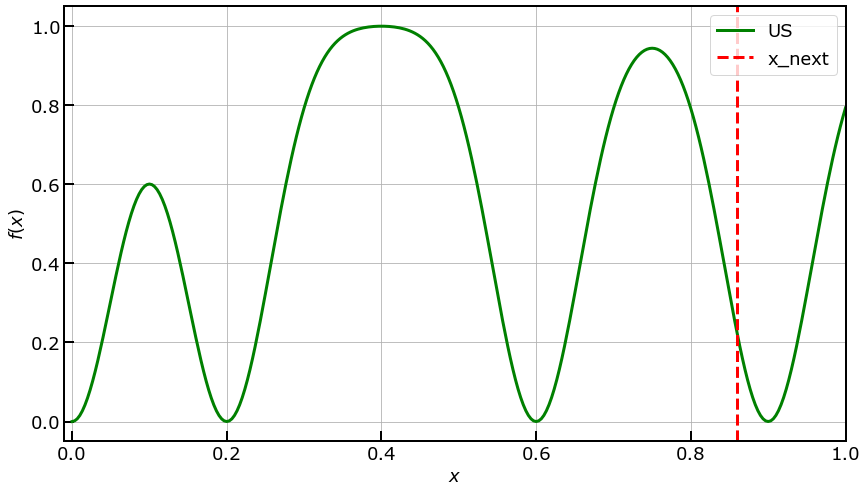

In [73]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_next_point_acquisition()

## Automate the Search

In [74]:
from emukit.experimental_design.experimental_design_loop import ExperimentalDesignLoop

In [75]:
ed = ExperimentalDesignLoop(space=space, model=emukit_model)

ed.run_loop(target_function, 10)

Optimization restart 1/1, f = -12.621458954073407
Optimization restart 1/1, f = -18.175439354347624
Optimization restart 1/1, f = -25.437037844740594
Optimization restart 1/1, f = -33.28564043323141
Optimization restart 1/1, f = -41.12908810762357
Optimization restart 1/1, f = -49.074821286840404
Optimization restart 1/1, f = -57.036265376351935
Optimization restart 1/1, f = -64.99562451120397
Optimization restart 1/1, f = -72.96484550992145
Optimization restart 1/1, f = -80.94789849056627
Optimization restart 1/1, f = -88.860250852282


In [76]:
mu_plot, var_plot = ed.model.predict(x_plot)

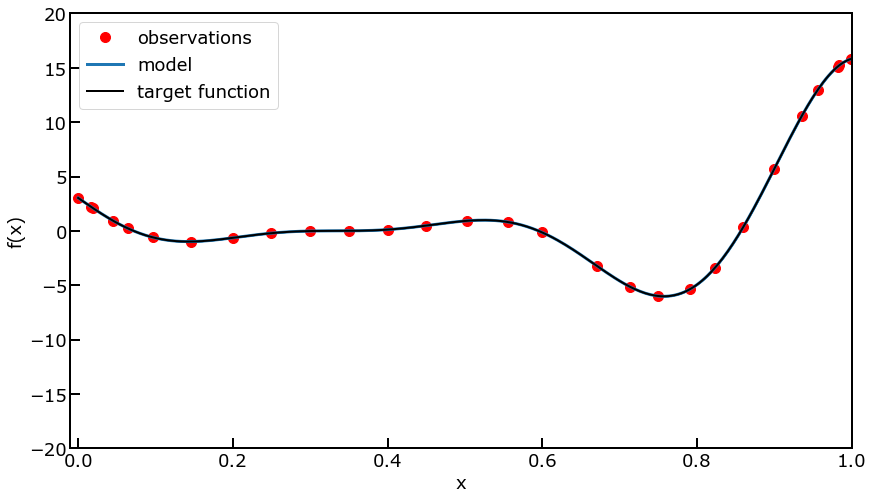

In [77]:
fig, ax = plt.subplots(figsize=(14,8))
helper_plot_emulator_errorbars()